In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

C:\Users\laral\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\numpy\resampled_std_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_ymax

array([[2.0687921028951544, 'd13c_site1b_08_025.tif'],
       [1.81882744447665, 'd13c_site1b_08_027.tif'],
       [1.359260205548864, 'd13c_site1b_09_028.tif'],
       [1.7388144327839097, 'd13c_site1b_09_030.tif'],
       [1.479679623146931, 'd13c_site1b_12_029.tif'],
       [1.269813836646399, 'd13c_site1b_12_035.tif'],
       [1.637949414618502, 'd13c_site1b_14_023.tif'],
       [2.519208709463689, 'd13c_site1b_14_053.tif'],
       [1.689545418093547, 'd13c_site1b_15_022.tif'],
       [1.5014405116181198, 'd13c_site1b_16_041.tif'],
       [1.7438204562710102, 'd13c_site1b_17_038.tif'],
       [1.457677065587903, 'd13c_site1b_17_042.tif'],
       [2.597986973506071, 'd13c_site1b_17_043.tif'],
       [1.468458208420952, 'd13c_site1b_17_045.tif'],
       [1.2826063246579378, 'd13c_site1b_18_048.tif'],
       [1.396947970103634, 'd13c_site1b_18_051.tif'],
       [1.7960427858214916, 'd13c_site1b_19_030.tif'],
       [1.5117030319018645, 'd13c_site1b_19_048.tif'],
       [1.577795053124

In [3]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\numpy\origin_std_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_ymax
site_name = []


# Loop through all files in the folder
for filename in d13c_trait_pdf_ymax[:,1]:
#     print(filename)
    site = filename.split('d13c_')[1]
    site_name.append(site)

tiff_dir = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\d13c'


band_data_list = []

for f_name in site_name:
    print(f_name)
    band_data_dict = {"filename": f_name}

    dataset = gdal.Open(os.path.join(tiff_dir, f_name))
    num_bands = dataset.RasterCount
    for band in range(1, num_bands + 1):
        # Get the band object
        band_obj = dataset.GetRasterBand(band)

        # Get band name, you might need to adjust this part to get the actual band name
        band_name = f"band_{band}"

        # Read band data as an array
        band_values = band_obj.ReadAsArray()

        # Filter out the -9999.0 values and get the valid values
        valid_values = [val for val in band_values.flatten() if val != -9999.0]

        # Store the valid values with the band name
        band_data_dict[band_name] = valid_values

    band_data_list.append(band_data_dict)

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(band_data_list)
for column in df.columns:
    # Check if the first row of this column is a list (assuming rest will be similar)
    if isinstance(df[column].iloc[0], list):
        # Remove the list and get the single value
        df[column] = df[column].apply(lambda x: x[0] if len(x) == 1 else x)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\wenqu\\trait_map\\update1\\trait_map_with_scale\\training\\numpy\\origin_std_d13c.npy'

In [4]:
df_spectral = df
df_spectral

,filename,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,site1b_08_025.tif,0.015530,0.012330,0.013138,0.011487,0.019282,0.016061,0.019116,0.019019,0.022247,...,0.026986,0.027582,0.024639,0.032859,0.026864,0.070102,0.076302,0.054107,0.096432,0.048397
1,site1b_08_027.tif,0.010203,0.011842,0.013479,0.011724,0.019912,0.015466,0.017308,0.019113,0.020695,...,0.058747,0.054097,0.048855,0.045194,0.049291,0.072694,0.098501,0.300149,0.144051,0.066305
2,site1b_09_028.tif,0.006645,0.011930,0.014607,0.014739,0.018153,0.019467,0.021518,0.022907,0.024639,...,0.030415,0.030288,0.032028,0.036514,0.045322,0.043860,0.122543,0.279037,0.081118,0.068412
3,site1b_09_030.tif,-0.001851,0.002005,0.007812,0.005726,0.011073,0.010525,0.013337,0.016856,0.019017,...,0.022529,0.021038,0.026056,0.033581,0.032948,0.045921,0.123889,0.294692,0.107393,0.073712
4,site1b_12_029.tif,0.009582,0.013725,0.018156,0.021375,0.019513,0.022464,0.025571,0.026385,0.027904,...,0.043679,0.045252,0.043406,0.041787,0.047786,0.050504,0.141280,0.258020,0.166465,0.080137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,site6_55_009.tif,0.036976,0.030732,0.027157,0.027013,0.028782,0.029882,0.030916,0.035789,0.036144,...,0.077743,0.075721,0.069707,0.078426,0.067656,0.076694,0.257025,0.334686,0.198551,0.078130
434,site6_55_010.tif,0.017687,0.029311,0.024823,0.025234,0.027849,0.029225,0.030655,0.033508,0.035585,...,0.073891,0.072373,0.068211,0.080692,0.073772,0.087726,0.238959,0.244229,0.108440,0.073833
435,site6_56_008.tif,0.024493,0.032721,0.024011,0.023344,0.028793,0.028631,0.029709,0.033150,0.036126,...,0.073257,0.067961,0.063227,0.068943,0.080177,0.085050,0.200354,0.275683,0.233892,0.099366
436,site6_56_009.tif,0.027422,0.029281,0.031863,0.022390,0.025971,0.030068,0.032959,0.034209,0.036921,...,0.072728,0.069023,0.066231,0.073100,0.070084,0.083366,0.230209,0.336358,0.214847,0.130138


In [5]:
print(df_spectral['filename'])

0      site1b_08_025.tif
1      site1b_08_027.tif
2      site1b_09_028.tif
3      site1b_09_030.tif
4      site1b_12_029.tif
             ...        
433     site6_55_009.tif
434     site6_55_010.tif
435     site6_56_008.tif
436     site6_56_009.tif
437     site6_56_010.tif
Name: filename, Length: 438, dtype: object


In [6]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [7]:
x_spectra = df_spectral[band_name]
x_spectra = x_spectra.to_numpy()

In [8]:
x_spectra.shape

(438, 319)

In [9]:
# vertically stack two section of arrays to create a new array
site1b_x = x_spectra[0:80, :]
site2a_x = x_spectra[115:195, :]
site2c_x = x_spectra[230:310,:]
site6_x1 = x_spectra[354:550,:]

x = np.vstack((site1b_x, site2a_x,site2c_x,site6_x1))
# site2c_x = x[]
x.shape

(324, 319)

In [10]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\numpy\resampled_std_d13c.npy',  allow_pickle=True)
y1 = np.array(d13c_trait_pdf_ymax)

In [11]:
len(y1[:, 1])

438

In [12]:
print(y1[:, 1])

['d13c_site1b_08_025.tif' 'd13c_site1b_08_027.tif'
 'd13c_site1b_09_028.tif' 'd13c_site1b_09_030.tif'
 'd13c_site1b_12_029.tif' 'd13c_site1b_12_035.tif'
 'd13c_site1b_14_023.tif' 'd13c_site1b_14_053.tif'
 'd13c_site1b_15_022.tif' 'd13c_site1b_16_041.tif'
 'd13c_site1b_17_038.tif' 'd13c_site1b_17_042.tif'
 'd13c_site1b_17_043.tif' 'd13c_site1b_17_045.tif'
 'd13c_site1b_18_048.tif' 'd13c_site1b_18_051.tif'
 'd13c_site1b_19_030.tif' 'd13c_site1b_19_048.tif'
 'd13c_site1b_20_034.tif' 'd13c_site1b_21_036.tif'
 'd13c_site1b_22_020.tif' 'd13c_site1b_22_021.tif'
 'd13c_site1b_24_024.tif' 'd13c_site1b_24_039.tif'
 'd13c_site1b_24_040.tif' 'd13c_site1b_24_058.tif'
 'd13c_site1b_25_037.tif' 'd13c_site1b_25_076.tif'
 'd13c_site1b_26_028.tif' 'd13c_site1b_26_029.tif'
 'd13c_site1b_26_044.tif' 'd13c_site1b_26_045.tif'
 'd13c_site1b_26_060.tif' 'd13c_site1b_26_061.tif'
 'd13c_site1b_26_062.tif' 'd13c_site1b_27_020.tif'
 'd13c_site1b_27_036.tif' 'd13c_site1b_27_041.tif'
 'd13c_site1b_27_062.tif' 'd13c

In [13]:
labels1 = [] 
for i in range(len(y1[:, 1])):
    substrings = y1[:, 1][i]
    site_name = substrings.split("_")[1]
    labels1.append(site_name)

In [14]:
labels1

['site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',

In [15]:
site1b_labels1 = labels1[0:80]
site2a_labels1 = labels1[115:195]
site2c_labels1 = labels1[230:310]
site6_labels1_1 = labels1[354:550]
# site6_labels1_2 = labels1[3394:3574]
labels = site1b_labels1 + site2a_labels1 + site2c_labels1 + site6_labels1_1
len(labels)

324

In [16]:
site1b_labels1

['site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b']

In [ ]:
def pls_variable_selection(X, y, max_comp):
    
    # Define an MSE array to be populated
    mse = np.zeros((max_comp, X.shape[1] - max_comp +1 ))



    # Loop over the number of PLS components
    for i in range(max_comp):
        # print(i)
        
        # Regression with the specified number of components, using the full spectrum
        pls1 = PLSRegression(n_components=i + 1)
        pls1.fit(X, y)
        
        # Indices of sorted spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_.flatten()))
 
        # Sort spectra accordingly
        Xc = X[:, sorted_ind]
        
        max_j = min(Xc.shape[1] - (i + 1), mse.shape[1]) 
        # Discard one wavelength at a time from the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(max_j): 
            pls2 = PLSRegression(n_components=i + 1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y.astype(np.float64), cv=5)
          

            mse[i, j] = np.sqrt(mean_squared_error(y, y_cv))        
            

      

    
    stdout.write("\n")
    
    # Find the indices of the minimum non-NaN MSE values
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))

    
    print("Optimised number of PLS components: ", mseminx[0] + 1)
    print("Wavelengths to be kept ", (X.shape[1] - mseminy[0]))
    print('Optimised MSEP ', mse[mseminx, mseminy][0])
    stdout.write("\n")
 
    # Calculate PLS with optimal components and export values
    optimal_pls = PLSRegression(n_components=mseminx[0] + 1)
    optimal_pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(optimal_pls.coef_.flatten()))
 
    Xc = X[:, sorted_ind]
 
    return Xc[:, mseminy[0]:], mseminx[0] + 1, mseminy[0], sorted_ind

In [5]:

def simple_pls_cv_label_category(X,x1,x2,x3,x4, y,y1,y2,y3,y4, n_comp,labels, filename):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y[:, 0].astype(np.float64))
    y_c = pls.predict(X)
    
    y_c_site1b = pls.predict(x1)
    y_c_site2a = pls.predict(x2)
    y_c_site2c = pls.predict(x3)
    y_c_site6 = pls.predict(x4)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y[:, 0].astype(np.float64), cv=10)
    
    y_cv_site1b = cross_val_predict(pls, x1, y1[:, 0].astype(np.float64), cv=10)
    y_cv_site2a = cross_val_predict(pls, x2, y2[:, 0].astype(np.float64), cv=10)
    y_cv_site2c = cross_val_predict(pls, x3, y3[:, 0].astype(np.float64), cv=10)
    y_cv_site6 = cross_val_predict(pls, x4, y4[:, 0].astype(np.float64), cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y[:, 0].astype(np.float64), y_c)
    score_cv = r2_score(y[:, 0].astype(np.float64), y_cv)
    

    


    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y[:, 0].astype(np.float64), y_c)
    mse_cv = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression 
    z = np.polyfit(y[:, 0].astype(np.float64), y_cv, 1)

    print(print(z[1],z[0]))
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'purple'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'p', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'},
            'site6add': {'marker': '^', 'color': 'red'}

        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                print(i, label, y_cv[i], y[i])
                csvwriter.writerow([i, label, y_cv[i], y[i]])
                
        # enumerate() method adds a counter to an iterable and returns it in a form of enumerating object
        # marker style; color map and edge color
        for i, label in enumerate(labels):
            scatter_obj = ax.scatter(y_cv[i], y[i,0].astype(np.float64), marker=label_dict.get(label)['marker'],
                                     c=label_dict.get(label)['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)


        ax.plot(z[1]+z[0]*y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), c='red', linewidth=1)

        ax.plot(y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), color='black', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()









#     trend_line = z[1]+z[0]*y[:, 0].astype(np.float64)
#     center_line = y[:, 0].astype(np.float64)
#     y = y[:, 0].astype(np.float64)
#     return (trend_line, center_line, y, score_cv)


# d13c

In [19]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\numpy\resampled_ymax_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\numpy\resampled_std_d13c.npy',  allow_pickle=True)

In [20]:
y_d13c_max1 = np.array(d13c_trait_pdf_ymax)
y_d13c_std1 = np.array(d13c_trait_pdf_std)

In [21]:
y_d13c_max1.shape

(438, 2)

In [22]:
y_d13c_max1[0:438, :]

array([[-30.678028159894332, 'd13c_site1b_08_025.tif'],
       [-29.676667771079387, 'd13c_site1b_08_027.tif'],
       [-30.003644458637062, 'd13c_site1b_09_028.tif'],
       [-30.41829554553796, 'd13c_site1b_09_030.tif'],
       [-29.03482944062378, 'd13c_site1b_12_029.tif'],
       [-28.525675735458304, 'd13c_site1b_12_035.tif'],
       [-30.25101433787013, 'd13c_site1b_14_023.tif'],
       [-27.76752775436193, 'd13c_site1b_14_053.tif'],
       [-30.190716737939958, 'd13c_site1b_15_022.tif'],
       [-27.080837119910413, 'd13c_site1b_16_041.tif'],
       [-29.013316778478206, 'd13c_site1b_17_038.tif'],
       [-29.349497299026268, 'd13c_site1b_17_042.tif'],
       [-29.13643434065024, 'd13c_site1b_17_043.tif'],
       [-28.055665317252906, 'd13c_site1b_17_045.tif'],
       [-27.68987904482266, 'd13c_site1b_18_048.tif'],
       [-27.293536379619702, 'd13c_site1b_18_051.tif'],
       [-29.91480989789845, 'd13c_site1b_19_030.tif'],
       [-27.519673807855483, 'd13c_site1b_19_048.tif'],

In [23]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_max1 = y_d13c_max1[0:80, :]
site2a_y_d13c_max1 = y_d13c_max1[115:195, :]
site2c_y_d13c_max1 = y_d13c_max1[230:310,:]
site6_y_d13c_max1_1 = y_d13c_max1[354:550,:]

y_d13c_max = np.vstack((site1b_y_d13c_max1, site2a_y_d13c_max1,site2c_y_d13c_max1,site6_y_d13c_max1_1))
# site2c_x = x[]
y_d13c_max.shape

(324, 2)

In [24]:
y_d13c_max

array([[-30.678028159894332, 'd13c_site1b_08_025.tif'],
       [-29.676667771079387, 'd13c_site1b_08_027.tif'],
       [-30.003644458637062, 'd13c_site1b_09_028.tif'],
       [-30.41829554553796, 'd13c_site1b_09_030.tif'],
       [-29.03482944062378, 'd13c_site1b_12_029.tif'],
       [-28.525675735458304, 'd13c_site1b_12_035.tif'],
       [-30.25101433787013, 'd13c_site1b_14_023.tif'],
       [-27.76752775436193, 'd13c_site1b_14_053.tif'],
       [-30.190716737939958, 'd13c_site1b_15_022.tif'],
       [-27.080837119910413, 'd13c_site1b_16_041.tif'],
       [-29.013316778478206, 'd13c_site1b_17_038.tif'],
       [-29.349497299026268, 'd13c_site1b_17_042.tif'],
       [-29.13643434065024, 'd13c_site1b_17_043.tif'],
       [-28.055665317252906, 'd13c_site1b_17_045.tif'],
       [-27.68987904482266, 'd13c_site1b_18_048.tif'],
       [-27.293536379619702, 'd13c_site1b_18_051.tif'],
       [-29.91480989789845, 'd13c_site1b_19_030.tif'],
       [-27.519673807855483, 'd13c_site1b_19_048.tif'],

In [25]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_std1 = y_d13c_std1[0:80, :]
site2a_y_d13c_std1 = y_d13c_std1[115:195, :]
site2c_y_d13c_std1 = y_d13c_std1[230:310,:]
site6_y_d13c_std1_1 = y_d13c_std1[354:550,:]

y_d13c_std = np.vstack((site1b_y_d13c_std1, site2a_y_d13c_std1,site2c_y_d13c_std1,site6_y_d13c_std1_1))
# site2c_x = x[]
y_d13c_std.shape

(324, 2)

In [6]:
opt_Xc_d13c_max, ncomp_d13c_max, wav_d13c_max, sorted_ind_d13c_max = plot_mse_vs_components_and_select_bands(
    x_spectra, y_d13c_max1, max_comp=50, threshold=0.01
)

NameError: name 'x_spectra' is not defined

In [27]:
opt_Xc_d13c_max.shape

(324, 91)

In [28]:
x1_d13c_max = opt_Xc_d13c_max[0:80,:]
x2_d13c_max = opt_Xc_d13c_max[80:160,:]
x3_d13c_max = opt_Xc_d13c_max[160:240,:]
x4_d13c_max = opt_Xc_d13c_max[240:550,:]

y1_d13c_max = y_d13c_max[0:80,:]
y2_d13c_max = y_d13c_max[80:160,:]
y3_d13c_max = y_d13c_max[160:240,:]
y4_d13c_max = y_d13c_max[240:550,:]

In [29]:
y4_d13c_max.shape

(84, 2)

R2 calib: 0.789
R2 CV: 0.552
MSE calib: 0.248
MSE CV: 0.528
[-10.78865153] [0.62062642]
None
0 site1b [-29.56593446] [-30.678028159894332 'd13c_site1b_08_025.tif']
1 site1b [-29.88117916] [-29.676667771079387 'd13c_site1b_08_027.tif']
2 site1b [-29.6856315] [-30.003644458637062 'd13c_site1b_09_028.tif']
3 site1b [-31.02254835] [-30.41829554553796 'd13c_site1b_09_030.tif']
4 site1b [-28.38729772] [-29.03482944062378 'd13c_site1b_12_029.tif']
5 site1b [-28.05521678] [-28.525675735458304 'd13c_site1b_12_035.tif']
6 site1b [-29.30034527] [-30.25101433787013 'd13c_site1b_14_023.tif']
7 site1b [-26.43279372] [-27.76752775436193 'd13c_site1b_14_053.tif']
8 site1b [-29.93243923] [-30.190716737939958 'd13c_site1b_15_022.tif']
9 site1b [-27.23498513] [-27.080837119910413 'd13c_site1b_16_041.tif']
10 site1b [-28.88089644] [-29.013316778478206 'd13c_site1b_17_038.tif']
11 site1b [-29.15211936] [-29.349497299026268 'd13c_site1b_17_042.tif']
12 site1b [-29.93827117] [-29.13643434065024 'd13c_site1b_

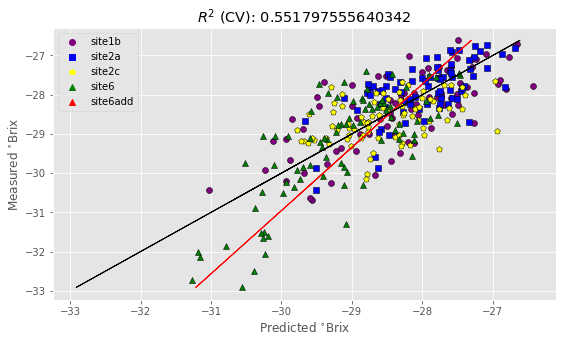

In [30]:
file_name_d13c_mean = 'E:/wenqu/model_csv_point/d13c_mean_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_max,x1_d13c_max,x2_d13c_max,x3_d13c_max,x4_d13c_max,
                             y_d13c_max,y1_d13c_max,y2_d13c_max,y3_d13c_max,y4_d13c_max,
                             ncomp_d13c_max, labels, file_name_d13c_mean)

In [98]:
optimal_pls_sla  = PLSRegression(n_components=17)
optimal_pls_sla.fit(opt_Xc_d13c_max, y_d13c_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_d13c_max][wav_d13c_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(91,) (91,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 4.78699026,  4.53926282, -2.06484409,  1.67559531,  0.97820473,
       -0.60213034, -0.41831562, -1.70502689,  1.02596913, -3.15747262,
       -1.24230288, -1.71343543, -2.00314251, -1.73433661, -3.88865562,
       -2.7247787 ,  1.87281906, -1.33363017,  1.94749585, -1.2220708 ,
        1.89825719, -2.11795145, -2.9170703 ,  1.53488182,  2.47720427,
       -2.39579137, -0.85910106,  3.70049174, -0.76967996,  1.25003811,
       -2.77974182, -0.00577229,  2.33006908,  2.74416583, -1.03698961,
       -2.63425564,  2.0993563 ,  0.59978276,  0.75833605,  1.17342754,
        1.42226691,  1.21791156,  3.1908588 , -2.23833319, -2.59386913,
        0.7431388 ,  0.86263468, -3.54465974,  2.06328414, -1.83300313,
        1.54547328,  1.20504606, -1.68080047,  0.47223591, -3.54158037,
       -0.53164497,  3.26301592, -1.49132198,  0.68708968,  2.29220173,
        3.14134416, -2.67469643,  2.29168054,  3.02086628, -3.43981901,
        2.31503046, -2.05949559, -3.53329746, -2.40957119, -4.21

In [99]:
optimal_pls_sla.intercept_

array([-28.56659559])

In [100]:
bands_sla

array(['band_256', 'band_252', 'band_276', 'band_238', 'band_27',
       'band_71', 'band_32', 'band_388', 'band_107', 'band_178',
       'band_267', 'band_93', 'band_339', 'band_357', 'band_266',
       'band_45', 'band_124', 'band_375', 'band_263', 'band_360',
       'band_149', 'band_158', 'band_275', 'band_258', 'band_223',
       'band_119', 'band_34', 'band_180', 'band_24', 'band_69',
       'band_164', 'band_172', 'band_82', 'band_356', 'band_221',
       'band_44', 'band_390', 'band_48', 'band_25', 'band_283',
       'band_109', 'band_391', 'band_161', 'band_160', 'band_62',
       'band_100', 'band_67', 'band_232', 'band_345', 'band_118',
       'band_231', 'band_53', 'band_222', 'band_39', 'band_362',
       'band_397', 'band_364', 'band_72', 'band_184', 'band_37',
       'band_369', 'band_354', 'band_401', 'band_281', 'band_170',
       'band_394', 'band_52', 'band_121', 'band_147', 'band_372',
       'band_165', 'band_176', 'band_43', 'band_271', 'band_359',
       'band_33

# d13 std

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  222
Optimised MSEP  0.19732558800134384



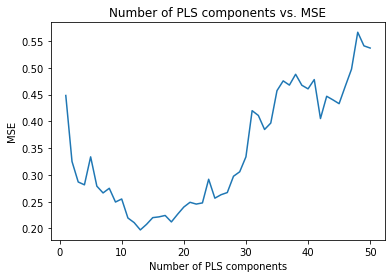

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [31]:
opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(x, y_d13c_std, 50)

In [32]:
x1_d13c_std = opt_Xc_d13c_std[0:80,:]
x2_d13c_std = opt_Xc_d13c_std[80:160,:]
x3_d13c_std = opt_Xc_d13c_std[160:240,:]
x4_d13c_std = opt_Xc_d13c_std[240:550,:]

y1_d13c_std = y_d13c_std[0:80,:]
y2_d13c_std = y_d13c_std[80:160,:]
y3_d13c_std = y_d13c_std[160:240,:]
y4_d13c_std = y_d13c_std[240:550,:]

R2 calib: 0.841
R2 CV: 0.669
MSE calib: 0.087
MSE CV: 0.182
[0.51640818] [0.78611522]
None
0 site1b [2.65515301] [2.0687921028951544 'd13c_site1b_08_025.tif']
1 site1b [1.41048197] [1.81882744447665 'd13c_site1b_08_027.tif']
2 site1b [1.71121679] [1.359260205548864 'd13c_site1b_09_028.tif']
3 site1b [1.76476303] [1.7388144327839097 'd13c_site1b_09_030.tif']
4 site1b [1.01072008] [1.479679623146931 'd13c_site1b_12_029.tif']
5 site1b [1.31220622] [1.269813836646399 'd13c_site1b_12_035.tif']
6 site1b [1.52207266] [1.637949414618502 'd13c_site1b_14_023.tif']
7 site1b [3.02924748] [2.519208709463689 'd13c_site1b_14_053.tif']
8 site1b [2.15490136] [1.689545418093547 'd13c_site1b_15_022.tif']
9 site1b [1.98007635] [1.5014405116181198 'd13c_site1b_16_041.tif']
10 site1b [1.59006409] [1.7438204562710102 'd13c_site1b_17_038.tif']
11 site1b [1.61904241] [1.457677065587903 'd13c_site1b_17_042.tif']
12 site1b [1.80375455] [2.597986973506071 'd13c_site1b_17_043.tif']
13 site1b [1.95793291] [1.468458

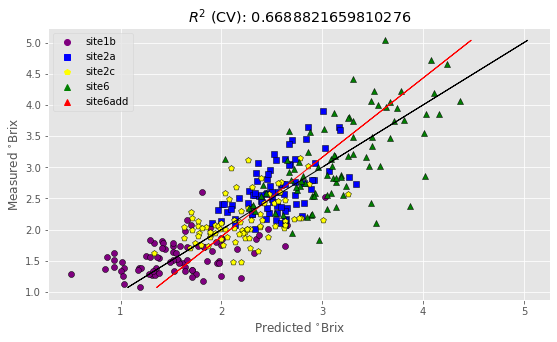

In [33]:
file_name_d13c_std = 'E:/wenqu/model_csv_point/d13c_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_std,x1_d13c_std,x2_d13c_std,x3_d13c_std,x4_d13c_std,
                             y_d13c_std,y1_d13c_std,y2_d13c_std,y3_d13c_std,y4_d13c_std,
                             ncomp_d13c_std, labels,file_name_d13c_std)

In [101]:
optimal_pls_sla  = PLSRegression(n_components=13)
optimal_pls_sla.fit(opt_Xc_d13c_std, y_d13c_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_d13c_std][wav_d13c_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(97,) (97,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.75123765,  0.47086128, -1.14891228, -0.61356492, -0.55592246,
        0.76746221, -0.78288668, -0.91440532, -0.07992538,  0.23790506,
       -1.0787358 , -0.32882069, -0.26340681, -0.06209026, -0.97924471,
       -0.84576425, -0.80787134,  0.34670278,  0.26869252,  0.08445761,
        1.11991098, -1.02876745, -1.10201886, -1.03926714, -0.61776357,
        1.25427691, -0.69378976, -0.81435383,  1.51673142,  1.05002659,
        0.55028571, -1.07768084,  0.87790966,  0.90685627,  0.66918669,
       -0.89463962, -0.40025062, -0.18786073, -0.4190451 , -0.62768171,
        0.68012136,  0.90123902,  1.19163553,  0.16572773, -0.68027775,
       -1.221056  , -1.67141034,  0.6259596 ,  0.74897312,  1.10817916,
        0.42589831, -1.07135526, -0.17457684,  1.40451759,  0.26018834,
        1.17683996,  0.48649331, -0.66496095,  0.74692697,  0.65585157,
       -1.0070635 ,  0.3287343 , -1.31864424, -1.00617669,  0.34092269,
        0.54156882, -0.40321738,  0.94827689, -0.97057888,  0.97

In [102]:
optimal_pls_sla.intercept_

array([2.38762773])

In [103]:
bands_sla

array(['band_97', 'band_216', 'band_252', 'band_19', 'band_83', 'band_30',
       'band_37', 'band_121', 'band_106', 'band_233', 'band_350',
       'band_270', 'band_28', 'band_157', 'band_88', 'band_174',
       'band_96', 'band_400', 'band_170', 'band_278', 'band_241',
       'band_384', 'band_364', 'band_365', 'band_279', 'band_137',
       'band_222', 'band_34', 'band_158', 'band_258', 'band_180',
       'band_249', 'band_380', 'band_118', 'band_91', 'band_171',
       'band_25', 'band_337', 'band_81', 'band_345', 'band_128',
       'band_52', 'band_59', 'band_45', 'band_221', 'band_334',
       'band_224', 'band_285', 'band_373', 'band_235', 'band_92',
       'band_251', 'band_265', 'band_26', 'band_165', 'band_94',
       'band_21', 'band_387', 'band_113', 'band_31', 'band_176',
       'band_50', 'band_156', 'band_173', 'band_71', 'band_404',
       'band_335', 'band_42', 'band_40', 'band_256', 'band_103',
       'band_44', 'band_145', 'band_226', 'band_65', 'band_381',
       'b

# d15n

In [34]:
d15n_trait_pdf_ymax = np.load(r'E:/wenqu/trait_map/update1/trait_map_with_scale/training/numpy/resampled_ymax_d15n.npy',  allow_pickle=True)
d15n_trait_pdf_std = np.load(r'E:/wenqu/trait_map/update1\trait_map_with_scale/training/numpy/resampled_std_d15n.npy',  allow_pickle=True)

In [35]:
y_d15n_max1 = np.array(d15n_trait_pdf_ymax)
y_d15n_std1 = np.array(d15n_trait_pdf_std)

In [36]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_max1 = y_d15n_max1[0:80, :]
site2a_y_d15n_max1 = y_d15n_max1[115:195, :]
site2c_y_d15n_max1 = y_d15n_max1[230:310,:]
site6_y_d15n_max1_1 = y_d15n_max1[354:550,:]

y_d15n_max = np.vstack((site1b_y_d15n_max1, site2a_y_d15n_max1,site2c_y_d15n_max1,site6_y_d15n_max1_1))
# site2c_x = x[]
y_d15n_max.shape

(324, 2)

In [37]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_std1 = y_d15n_std1[0:80, :]
site2a_y_d15n_std1 = y_d15n_std1[115:195, :]
site2c_y_d15n_std1 = y_d15n_std1[230:310,:]
site6_y_d15n_std1_1 = y_d15n_std1[354:550,:]

y_d15n_std = np.vstack((site1b_y_d15n_std1, site2a_y_d15n_std1,site2c_y_d15n_std1,site6_y_d15n_std1_1))
# site2c_x = x[]
y_d15n_std.shape

(324, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  9
Wavelengths to be discarded  280
Optimised MSEP  4.39664313283213



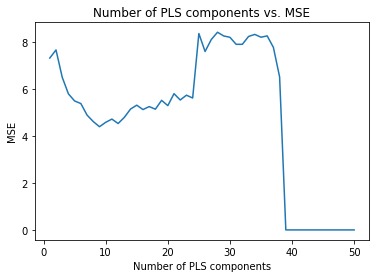

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [38]:
opt_Xc_d15n_max, ncomp_d15n_max, wav_d15n_max, sorted_ind_d15n_max = plot_mse_vs_components(x, y_d15n_max, 50)
x1_d15n_max = opt_Xc_d15n_max[0:80,:]
x2_d15n_max = opt_Xc_d15n_max[80:160,:]
x3_d15n_max = opt_Xc_d15n_max[160:240,:]
x4_d15n_max = opt_Xc_d15n_max[240:550,:]

y1_d15n_max = y_d15n_max[0:80,:]
y2_d15n_max = y_d15n_max[80:160,:]
y3_d15n_max = y_d15n_max[160:240,:]
y4_d15n_max = y_d15n_max[240:550,:]

R2 calib: 0.692
R2 CV: 0.590
MSE calib: 3.466
MSE CV: 4.616
[-1.04023481] [0.65500002]
None
0 site1b [0.229497] [6.383596946135354 'd15n_site1b_08_025.tif']
1 site1b [-0.90623365] [2.38182923127847 'd15n_site1b_08_027.tif']
2 site1b [1.94676029] [2.4122772141608992 'd15n_site1b_09_028.tif']
3 site1b [6.69800598] [5.5578206210811905 'd15n_site1b_09_030.tif']
4 site1b [0.26334123] [4.347239561379412 'd15n_site1b_12_029.tif']
5 site1b [-0.93747669] [-1.4025411842083493 'd15n_site1b_12_035.tif']
6 site1b [4.13474895] [6.001803253350756 'd15n_site1b_14_023.tif']
7 site1b [-5.48478065] [-4.653240962845874 'd15n_site1b_14_053.tif']
8 site1b [4.64123681] [6.125451979828228 'd15n_site1b_15_022.tif']
9 site1b [-4.90787673] [-4.708710529751064 'd15n_site1b_16_041.tif']
10 site1b [-2.99542197] [2.0332746381803055 'd15n_site1b_17_038.tif']
11 site1b [-4.22775574] [3.0320652255769893 'd15n_site1b_17_042.tif']
12 site1b [-1.51362053] [-0.4344703476182268 'd15n_site1b_17_043.tif']
13 site1b [-1.783632

234 site2c [-2.74577532] [-0.5012719199408266 'd15n_site2c_23_020.tif']
235 site2c [-2.810487] [0.5401809806469675 'd15n_site2c_23_021.tif']
236 site2c [-2.88304296] [-4.077211401827899 'd15n_site2c_23_025.tif']
237 site2c [-4.22271797] [-4.685955601652655 'd15n_site2c_23_026.tif']
238 site2c [-4.69018912] [-0.662125295093432 'd15n_site2c_24_020.tif']
239 site2c [-1.73137159] [-1.3774793131190624 'd15n_site2c_24_023.tif']
240 site6 [-7.05837961] [-14.359839935612627 'd15n_site6_19_037.tif']
241 site6 [-5.85259163] [-8.173391081473792 'd15n_site6_20_036.tif']
242 site6 [-5.22094853] [-7.895274504803574 'd15n_site6_21_034.tif']
243 site6 [-6.29656371] [-6.934334073356737 'd15n_site6_21_035.tif']
244 site6 [-5.77744136] [-8.193922560871663 'd15n_site6_22_034.tif']
245 site6 [-5.11532856] [-4.909023678692961 'd15n_site6_22_038.tif']
246 site6 [-7.21640311] [-6.150421330850417 'd15n_site6_23_033.tif']
247 site6 [-7.14184768] [-5.64235058816238 'd15n_site6_23_038.tif']
248 site6 [-6.11487794

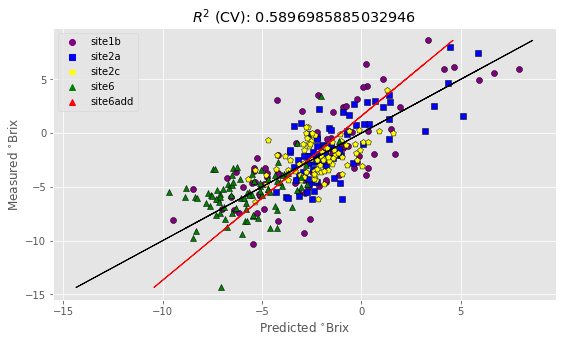

In [39]:
file_name_d15n_max = 'E:/wenqu/model_csv_point/d15n_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_max,x1_d15n_max,x2_d15n_max,x3_d15n_max,x4_d15n_max,
                             y_d15n_max,y1_d15n_max,y2_d15n_max,y3_d15n_max,y4_d15n_max,
                             ncomp_d15n_max, labels, file_name_d15n_max)

In [92]:
optimal_pls_sla  = PLSRegression(n_components=9)
optimal_pls_sla.fit(opt_Xc_d15n_max, y_d15n_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_d15n_max][wav_d15n_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(39,) (39,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 7.70761835, -4.56931117,  3.8664678 ,  5.5828807 , -2.64193492,
        1.67711686,  2.46154748,  4.23893395, -1.53427499, -2.11330758,
       -2.99587668,  2.68184217,  5.16603244, -4.66879534,  1.13396169,
       -2.57218075, -2.29509841, -3.04130112, -4.93472795, -0.44706324,
       -3.37776257, -3.84772031,  3.33273799, -0.41994267,  0.3137268 ,
       -4.75306434,  0.44633032, -3.1245154 , -4.90181274,  4.06621517,
       -2.29588361,  3.49212845,  7.40060186, -2.24637484,  6.53928042,
        3.2730217 , -5.68860762,  5.15904503, -4.98837705])

In [93]:
optimal_pls_sla.intercept_

array([-2.84931067])

In [94]:
bands_sla

array(['band_230', 'band_19', 'band_22', 'band_344', 'band_261',
       'band_404', 'band_385', 'band_160', 'band_273', 'band_69',
       'band_27', 'band_157', 'band_44', 'band_184', 'band_74',
       'band_223', 'band_269', 'band_259', 'band_370', 'band_221',
       'band_70', 'band_43', 'band_285', 'band_401', 'band_113',
       'band_270', 'band_156', 'band_107', 'band_37', 'band_166',
       'band_67', 'band_72', 'band_84', 'band_216', 'band_397', 'band_36',
       'band_114', 'band_30', 'band_329'], dtype='<U8')

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  264
Optimised MSEP  1.3372303407859278



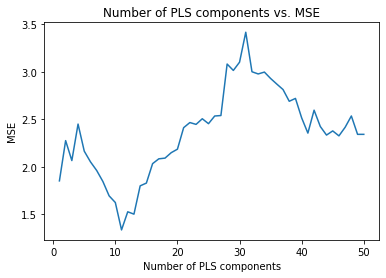

R2 calib: 0.594
R2 CV: 0.329
MSE calib: 0.732
MSE CV: 1.210
[2.45122186] [0.4344832]
None
0 site1b [5.77611193] [4.074609950819044 'd15n_site1b_08_025.tif']
1 site1b [2.04705623] [4.708200968523669 'd15n_site1b_08_027.tif']
2 site1b [3.16526483] [2.7782311630037113 'd15n_site1b_09_028.tif']
3 site1b [3.68037751] [3.9825056398017322 'd15n_site1b_09_030.tif']
4 site1b [1.6856054] [3.166245115303787 'd15n_site1b_12_029.tif']
5 site1b [3.34997388] [2.6681488670585325 'd15n_site1b_12_035.tif']
6 site1b [4.12450632] [3.3740631950465674 'd15n_site1b_14_023.tif']
7 site1b [5.13506196] [4.926476374093944 'd15n_site1b_14_053.tif']
8 site1b [5.10832559] [4.2715627284451845 'd15n_site1b_15_022.tif']
9 site1b [4.04990832] [4.180346274797324 'd15n_site1b_16_041.tif']
10 site1b [3.89652177] [4.305723493646823 'd15n_site1b_17_038.tif']
11 site1b [4.31642386] [3.743319367117429 'd15n_site1b_17_042.tif']
12 site1b [5.28073435] [8.425098290341227 'd15n_site1b_17_043.tif']
13 site1b [5.08207795] [3.430121

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


 [5.91216987292799 'd15n_site2a_17_022.tif']
97 site2a [5.6662779] [3.811956787768078 'd15n_site2a_18_030.tif']
98 site2a [6.25400797] [6.780169968139974 'd15n_site2a_18_032.tif']
99 site2a [4.30867638] [5.3216152157922085 'd15n_site2a_19_014.tif']
100 site2a [4.05860759] [6.690781442777434 'd15n_site2a_19_015.tif']
101 site2a [4.59609127] [6.612243949239192 'd15n_site2a_19_016.tif']
102 site2a [4.76714822] [5.525956025776301 'd15n_site2a_19_017.tif']
103 site2a [5.33772733] [7.616708100059441 'd15n_site2a_19_018.tif']
104 site2a [5.01264165] [6.07583589159468 'd15n_site2a_19_021.tif']
105 site2a [5.20527002] [5.313279828472091 'd15n_site2a_19_022.tif']
106 site2a [5.48584719] [6.443496988985411 'd15n_site2a_19_024.tif']
107 site2a [4.13953539] [5.072853810294293 'd15n_site2a_19_027.tif']
108 site2a [4.49847399] [4.447748032988602 'd15n_site2a_19_028.tif']
109 site2a [5.33352042] [6.443949515722445 'd15n_site2a_19_030.tif']
110 site2a [5.57083719] [5.471097722478851 'd15n_site2a_19_031

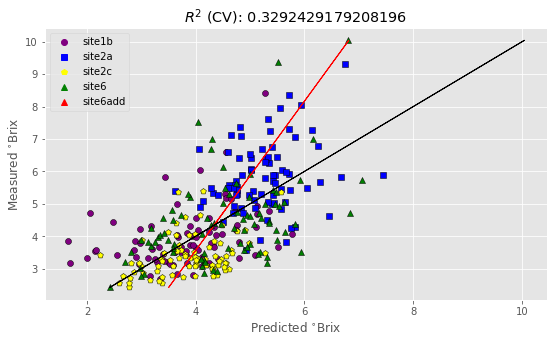

In [40]:
opt_Xc_d15n_std, ncomp_d15n_std, wav_d15n_std, sorted_ind_d15n_std = plot_mse_vs_components(x, y_d15n_std, 50)

x1_d15n_std = opt_Xc_d15n_std[0:80,:]
x2_d15n_std = opt_Xc_d15n_std[80:160,:]
x3_d15n_std = opt_Xc_d15n_std[160:240,:]
x4_d15n_std = opt_Xc_d15n_std[240:550,:]

y1_d15n_std = y_d15n_std[0:80,:]
y2_d15n_std = y_d15n_std[80:160,:]
y3_d15n_std = y_d15n_std[160:240,:]
y4_d15n_std = y_d15n_std[240:550,:]


file_name_d15n_std = 'E:/wenqu/model_csv_point/d15n_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_std,x1_d15n_std,x2_d15n_std,x3_d15n_std,x4_d15n_std,
                             y_d15n_std,y1_d15n_std,y2_d15n_std,y3_d15n_std,y4_d15n_std,
                             ncomp_d15n_std, labels, file_name_d15n_std)

In [95]:
optimal_pls_sla  = PLSRegression(n_components=11)
optimal_pls_sla.fit(opt_Xc_d15n_std, y_d15n_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_d15n_std][wav_d15n_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(55,) (55,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-3.72169856,  1.77502189,  1.98511403,  1.6625865 , -0.9069081 ,
       -1.23955595, -1.63329838, -0.12481896,  0.71792859, -2.54058605,
       -3.12256538, -1.54415735, -0.60167455,  1.69765996,  1.10876775,
       -2.54472738, -3.20064696,  1.88144186,  1.07518406,  3.32117439,
       -1.55407194,  0.97943531,  1.19043668,  1.45735009, -3.08505135,
       -3.70500651, -0.84244557,  1.98476595, -3.75221925,  0.85603229,
        3.55322827,  1.2322897 ,  0.87541617,  2.75432884,  1.81119045,
        1.95628535, -2.84671758,  1.44808788,  0.41305469, -0.68083463,
        1.36128421,  2.74804227,  2.67591495, -2.55666303,  1.80184549,
       -2.28839626,  1.77454505,  3.87418688,  2.99387509, -4.61638133,
       -2.43783295,  1.56392768, -2.65167328,  2.0238401 , -3.94731628])

In [96]:
optimal_pls_sla.intercept_

array([4.39998395])

In [97]:
bands_sla

array(['band_34', 'band_50', 'band_85', 'band_236', 'band_46', 'band_108',
       'band_178', 'band_106', 'band_180', 'band_160', 'band_361',
       'band_89', 'band_47', 'band_165', 'band_30', 'band_222',
       'band_105', 'band_389', 'band_162', 'band_398', 'band_48',
       'band_258', 'band_116', 'band_226', 'band_365', 'band_352',
       'band_155', 'band_371', 'band_146', 'band_37', 'band_223',
       'band_285', 'band_327', 'band_125', 'band_26', 'band_113',
       'band_357', 'band_216', 'band_117', 'band_185', 'band_21',
       'band_94', 'band_42', 'band_23', 'band_103', 'band_156',
       'band_149', 'band_225', 'band_104', 'band_364', 'band_220',
       'band_153', 'band_176', 'band_391', 'band_93'], dtype='<U8')

# LA

In [41]:
la_trait_pdf_ymax = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/numpy/resampled_ymax_la.npy',  allow_pickle=True)
la_trait_pdf_std = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/numpy/resampled_std_la.npy',  allow_pickle=True)

In [42]:
y_la_max1 = np.array(la_trait_pdf_ymax)

y_la_std1 = np.array(la_trait_pdf_std)

In [43]:
y_la_max1.shape

(438, 2)

In [44]:
# vertically stack two section of arrays to create a new array
site1b_y_la_max1 = y_la_max1[0:80, :]
site2a_y_la_max1 = y_la_max1[115:195, :]
site2c_y_la_max1 = y_la_max1[230:310,:]
site6_y_la_max1_1 = y_la_max1[354:550,:]
# site6_y_la_max1_2 = y_la_max1[3394:3574,:]
y_la_max = np.vstack((site1b_y_la_max1, site2a_y_la_max1,site2c_y_la_max1,site6_y_la_max1_1))
# site2c_x = x[]
y_la_max.shape

(324, 2)

In [45]:
# vertically stack two section of arrays to create a new array
site1b_y_la_std1 = y_la_std1[0:80, :]
site2a_y_la_std1 = y_la_std1[115:195, :]
site2c_y_la_std1 = y_la_std1[230:310,:]
site6_y_la_std1_1 = y_la_std1[354:550,:]

y_la_std = np.vstack((site1b_y_la_std1, site2a_y_la_std1,site2c_y_la_std1,site6_y_la_std1_1))
# site2c_x = x[]
y_la_std.shape

(324, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  19
Wavelengths to be discarded  231
Optimised MSEP  1.1171092813971049



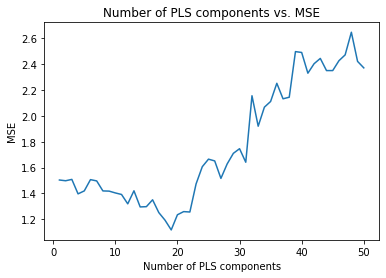

R2 calib: 0.721


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 CV: 0.419
MSE calib: 0.492
MSE CV: 1.025
[0.84547372] [0.60818799]
None
0 site1b [-1.34028799] [-3.2227670636547954 'la_site1b_08_025.tif']
1 site1b [0.45720477] [0.10002876233678926 'la_site1b_08_027.tif']
2 site1b [0.62038332] [0.03710002366009668 'la_site1b_09_028.tif']
3 site1b [-0.86255559] [-1.073304652708278 'la_site1b_09_030.tif']
4 site1b [1.87295279] [0.628352244134498 'la_site1b_12_029.tif']
5 site1b [1.47968544] [2.3972056086782763 'la_site1b_12_035.tif']
6 site1b [-0.52367055] [-1.2935820297175713 'la_site1b_14_023.tif']
7 site1b [1.9497748] [1.9562620994727284 'la_site1b_14_053.tif']
8 site1b [-1.32445975] [-0.6535303352957831 'la_site1b_15_022.tif']
9 site1b [4.07416] [4.555487887214881 'la_site1b_16_041.tif']
10 site1b [2.53612905] [-0.04375645974277731 'la_site1b_17_038.tif']
11 site1b [0.63649254] [0.2985605653713579 'la_site1b_17_042.tif']
12 site1b [1.47600105] [0.19031976337183032 'la_site1b_17_043.tif']
13 site1b [2.0886092] [3.519604240814173 'la_site1b_17_045

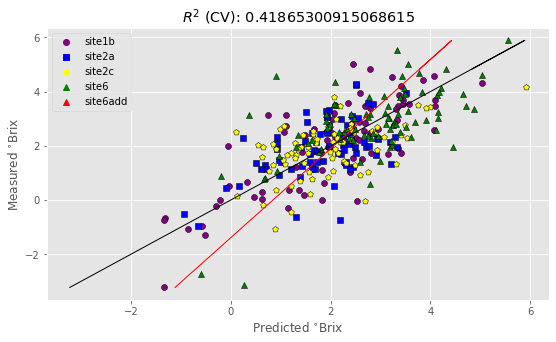

In [46]:
opt_Xc_la_max, ncomp_la_max, wav_la_max, sorted_ind_la_max = plot_mse_vs_components(x, y_la_max, 50)
x1_la_max = opt_Xc_la_max[0:80,:]
x2_la_max = opt_Xc_la_max[80:160,:]
x3_la_max = opt_Xc_la_max[160:240,:]
x4_la_max = opt_Xc_la_max[240:550,:]

y1_la_max = y_la_max[0:80,:]
y2_la_max = y_la_max[80:160,:]
y3_la_max = y_la_max[160:240,:]
y4_la_max = y_la_max[240:550,:]
file_name_la_max = 'E:/wenqu/model_csv_point/la_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_max,x1_la_max,x2_la_max,x3_la_max,x4_la_max,
                             y_la_max,y1_la_max,y2_la_max,y3_la_max,y4_la_max,
                             ncomp_la_max, labels,file_name_la_max)

In [86]:
optimal_pls_sla  = PLSRegression(n_components=19)
optimal_pls_sla.fit(opt_Xc_la_max, y_la_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_la_max][wav_la_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(88,) (88,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 1.75285454, -0.09353504,  3.35968302, -4.79750775, -1.90138276,
        1.08592219,  2.18472639, -2.69740573, -4.16642233,  1.40062827,
       -2.93896538,  8.48439809,  3.91823394,  4.62993066,  1.26365743,
        1.17142931, -1.81704931,  1.73433752,  0.90135354, -6.96191986,
       -2.57902617,  5.11240598,  1.16564195,  0.97892114, -2.44717742,
        0.66909489, -2.32940489, -2.38671987, -6.73545177,  1.24607133,
       -1.42022503, -7.61015355, -6.23097034,  0.94673031,  3.11868864,
       -2.28626749, -2.14548562,  3.23551759,  4.59183063, -4.82393424,
        0.86154284, -4.79553311,  3.97859784, -5.15518248, -3.19056319,
       -2.69870887,  5.5475196 ,  3.22742113, -4.73986311, -1.68134953,
        1.57442236, -7.64670305,  2.99877549, -2.22022623,  5.25522565,
        3.63746677, -1.6931033 ,  4.67306829, -2.86427087,  2.33451316,
       -5.82044036,  4.4405991 ,  3.97216192,  1.932878  ,  1.0078493 ,
       -6.40691696,  3.04038648, -2.0349588 , -5.65902381, -5.04

In [87]:
bands_sla

array(['band_399', 'band_346', 'band_181', 'band_90', 'band_404',
       'band_352', 'band_372', 'band_110', 'band_146', 'band_217',
       'band_339', 'band_260', 'band_143', 'band_258', 'band_277',
       'band_248', 'band_381', 'band_336', 'band_54', 'band_236',
       'band_30', 'band_100', 'band_347', 'band_102', 'band_28',
       'band_96', 'band_255', 'band_373', 'band_249', 'band_40',
       'band_61', 'band_360', 'band_233', 'band_271', 'band_221',
       'band_284', 'band_51', 'band_18', 'band_281', 'band_108',
       'band_229', 'band_245', 'band_259', 'band_367', 'band_81',
       'band_285', 'band_254', 'band_124', 'band_87', 'band_45',
       'band_218', 'band_272', 'band_391', 'band_397', 'band_125',
       'band_114', 'band_172', 'band_364', 'band_344', 'band_383',
       'band_84', 'band_262', 'band_223', 'band_147', 'band_25',
       'band_135', 'band_43', 'band_162', 'band_168', 'band_230',
       'band_130', 'band_176', 'band_86', 'band_37', 'band_109',
       'band

In [88]:
optimal_pls_sla.intercept_

array([2.16566616])

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  18
Wavelengths to be discarded  190
Optimised MSEP  0.3561508149598685



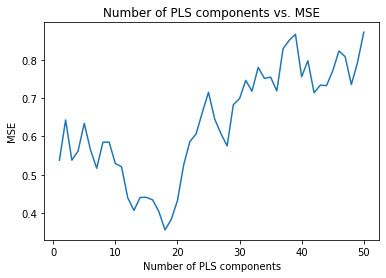

R2 calib: 0.811
R2 CV: 0.383
MSE calib: 0.106
MSE CV: 0.347


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


[1.06699177] [0.60906384]
None
0 site1b [2.6023976] [2.0439777154505716 'la_site1b_08_025.tif']
1 site1b [2.56757916] [2.6139512154235867 'la_site1b_08_027.tif']
2 site1b [1.94585652] [1.559874446296993 'la_site1b_09_028.tif']
3 site1b [1.79355967] [2.0028321119863834 'la_site1b_09_030.tif']
4 site1b [0.69491709] [1.531595956483698 'la_site1b_12_029.tif']
5 site1b [1.56456377] [1.5257272821474634 'la_site1b_12_035.tif']
6 site1b [2.05908929] [1.8943258408691441 'la_site1b_14_023.tif']
7 site1b [4.07706161] [2.7748370878345034 'la_site1b_14_053.tif']
8 site1b [2.03397957] [2.0845097641822785 'la_site1b_15_022.tif']
9 site1b [3.0964708] [2.317605615004454 'la_site1b_16_041.tif']
10 site1b [2.60863835] [2.173018959047896 'la_site1b_17_038.tif']
11 site1b [1.68569338] [2.1446988729643883 'la_site1b_17_042.tif']
12 site1b [2.38897011] [3.2773392731577027 'la_site1b_17_043.tif']
13 site1b [1.81309291] [2.1885253154821 'la_site1b_17_045.tif']
14 site1b [2.32434191] [1.6754145631040598 'la_sit

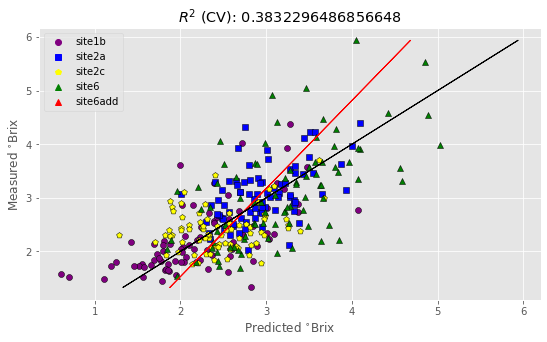

In [47]:
opt_Xc_la_std, ncomp_la_std, wav_la_std, sorted_ind_la_std = plot_mse_vs_components(x, y_la_std, 50)

x1_la_std = opt_Xc_la_std[0:80,:]
x2_la_std = opt_Xc_la_std[80:160,:]
x3_la_std = opt_Xc_la_std[160:240,:]
x4_la_std = opt_Xc_la_std[240:550,:]

y1_la_std = y_la_std[0:80,:]
y2_la_std = y_la_std[80:160,:]
y3_la_std = y_la_std[160:240,:]
y4_la_std = y_la_std[240:550,:]
file_name_la_std = 'E:/wenqu/model_csv_point/la_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_std,x1_la_std,x2_la_std,x3_la_std,x4_la_std,
                             y_la_std,y1_la_std,y2_la_std,y3_la_std,y4_la_std,
                             ncomp_la_std, labels, file_name_la_std)

In [89]:
optimal_pls_sla  = PLSRegression(n_components=18)
optimal_pls_sla.fit(opt_Xc_la_std, y_la_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_la_std][wav_la_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(129,) (129,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.65296949,  1.59327291,  0.69025653,  1.50291917, -0.77829718,
       -1.34408709,  2.20157634, -1.21908176, -0.41304464, -1.48747803,
       -2.01299788,  0.0099413 ,  0.71480293,  0.4300157 ,  0.54373745,
       -1.1094226 ,  1.14438998, -0.62036205,  1.07708961, -1.83974418,
        0.96055242,  0.0424396 , -0.6107626 , -1.53693393,  0.72601938,
       -1.03962951,  1.47002477, -1.25203963, -0.60397182,  0.98953414,
        1.40440365, -1.41201505,  1.22219776, -0.71018459, -1.20641443,
       -0.48970192,  1.50645574, -0.87903792,  0.92947659, -1.46208276,
       -2.00952374,  1.60937056,  0.63326806, -1.55772341,  0.40996914,
       -1.20133463, -0.07414033, -0.91021635,  2.12179114,  1.6692057 ,
       -2.11026357,  1.80077059, -1.46840897,  0.64674239,  1.00221099,
       -0.34974488, -1.93960432, -1.20804826,  0.04690975, -1.50002224,
        1.23752471,  1.28191508,  1.46873888, -1.45899443,  1.22596089,
        2.61606675, -1.94169988,  1.33645015, -1.39502237,  2.00

In [90]:
bands_sla

array(['band_126', 'band_180', 'band_69', 'band_385', 'band_79',
       'band_132', 'band_236', 'band_350', 'band_249', 'band_157',
       'band_250', 'band_86', 'band_348', 'band_339', 'band_389',
       'band_151', 'band_28', 'band_95', 'band_261', 'band_51',
       'band_141', 'band_90', 'band_387', 'band_246', 'band_404',
       'band_164', 'band_71', 'band_383', 'band_114', 'band_152',
       'band_374', 'band_337', 'band_54', 'band_354', 'band_63',
       'band_184', 'band_133', 'band_349', 'band_382', 'band_388',
       'band_245', 'band_42', 'band_147', 'band_97', 'band_344',
       'band_40', 'band_48', 'band_396', 'band_273', 'band_161',
       'band_232', 'band_391', 'band_234', 'band_24', 'band_148',
       'band_171', 'band_222', 'band_67', 'band_247', 'band_278',
       'band_72', 'band_336', 'band_125', 'band_185', 'band_27',
       'band_166', 'band_366', 'band_225', 'band_252', 'band_102',
       'band_270', 'band_20', 'band_398', 'band_365', 'band_342',
       'band_8

In [91]:
optimal_pls_sla.intercept_

array([2.69898437])

# SLA

In [48]:
sla_trait_pdf_ymax = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/numpy/resampled_ymax_sla.npy',  allow_pickle=True)
sla_trait_pdf_std = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/numpy/resampled_std_sla.npy',  allow_pickle=True)

In [49]:
y_sla_max1 = np.array(sla_trait_pdf_ymax)
y_sla_std1 = np.array(sla_trait_pdf_std)

In [50]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_max1 = y_sla_max1[0:80, :]
site2a_y_sla_max1 = y_sla_max1[115:195, :]
site2c_y_sla_max1 = y_sla_max1[230:310,:]
site6_y_sla_max1_1 = y_sla_max1[354:550,:]
# site6_y_sla_max1_2 = y_sla_max1[3394:3574,:]
y_sla_max = np.vstack((site1b_y_sla_max1, site2a_y_sla_max1,site2c_y_sla_max1,site6_y_sla_max1_1))
# site2c_x = x[]
y_sla_max.shape

(324, 2)

In [51]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_std1 = y_sla_std1[0:80, :]
site2a_y_sla_std1 = y_sla_std1[115:195, :]
site2c_y_sla_std1 = y_sla_std1[230:310,:]
site6_y_sla_std1_1 = y_sla_std1[354:550,:]
# site6_y_sla_std1_2 = y_sla_std1[3394:3574,:]
y_sla_std = np.vstack((site1b_y_sla_std1, site2a_y_sla_std1,site2c_y_sla_std1,site6_y_sla_std1_1))
# site2c_x = x[]
y_sla_std.shape

(324, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  264
Optimised MSEP  0.02032070175726883



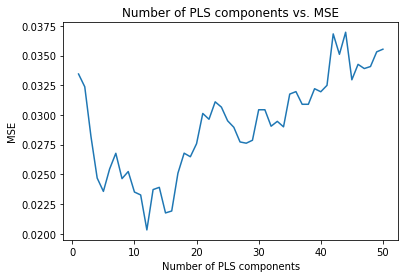

R2 calib: 0.707
R2 CV: 0.570
MSE calib: 0.014
MSE CV: 0.020
[1.65784693] [0.639192]
None
0 site1b [4.36931044] [3.966126512394397 'sla_site1b_08_025.tif']
1 site1b [4.53331062] [4.2959294820561915 'sla_site1b_08_027.tif']
2 site1b [4.36456328] [4.256470027404617 'sla_site1b_09_028.tif']
3 site1b [4.10464087] [4.171495748408313 'sla_site1b_09_030.tif']
4 site1b [4.4260497] [4.331689567629785 'sla_site1b_12_029.tif']
5 site1b [4.3296981] [4.410024435344043 'sla_site1b_12_035.tif']
6 site1b [4.17373343] [4.0557600072804 'sla_site1b_14_023.tif']
7 site1b [5.0903427] [4.918120118814928 'sla_site1b_14_053.tif']
8 site1b [4.08433486] [4.150457919301812 'sla_site1b_15_022.tif']
9 site1b [4.91600947] [4.909910505393742 'sla_site1b_16_041.tif']
10 site1b [4.60235017] [4.428133291493829 'sla_site1b_17_038.tif']
11 site1b [4.66709351] [4.4680289578106365 'sla_site1b_17_042.tif']
12 site1b [4.65791207] [4.508083236773925 'sla_site1b_17_043.tif']
13 site1b [4.58541663] [4.690550279180167 'sla_site1b

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


site2a [4.6117306] [4.82692502177295 'sla_site2a_20_019.tif']
120 site2a [4.61530702] [4.322020560660062 'sla_site2a_20_020.tif']
121 site2a [4.60419299] [4.688580971123024 'sla_site2a_20_022.tif']
122 site2a [4.64713234] [4.727070618728273 'sla_site2a_20_023.tif']
123 site2a [4.40259476] [4.169890743184129 'sla_site2a_21_026.tif']
124 site2a [4.37956507] [4.21125547439765 'sla_site2a_21_027.tif']
125 site2a [4.12265698] [4.109529178714508 'sla_site2a_21_030.tif']
126 site2a [4.49597083] [4.653928831646509 'sla_site2a_21_032.tif']
127 site2a [4.43741394] [4.562635983734738 'sla_site2a_21_033.tif']
128 site2a [4.62428535] [4.5417822086819655 'sla_site2a_22_012.tif']
129 site2a [4.51899718] [4.478885258565616 'sla_site2a_22_014.tif']
130 site2a [4.53545196] [4.550466062049667 'sla_site2a_22_015.tif']
131 site2a [4.58061427] [4.6059767855303075 'sla_site2a_22_016.tif']
132 site2a [4.65626437] [4.536410017673857 'sla_site2a_22_018.tif']
133 site2a [4.64262722] [4.632717415299032 'sla_site2

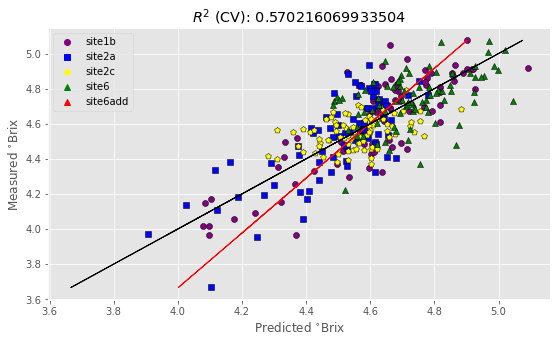

In [52]:
opt_Xc_sla_max, ncomp_sla_max, wav_sla_max, sorted_ind_sla_max = plot_mse_vs_components(x, y_sla_max, 50)
x1_sla_max = opt_Xc_sla_max[0:80,:]
x2_sla_max = opt_Xc_sla_max[80:160,:]
x3_sla_max = opt_Xc_sla_max[160:240,:]
x4_sla_max = opt_Xc_sla_max[240:550,:]

y1_sla_max = y_sla_max[0:80,:]
y2_sla_max = y_sla_max[80:160,:]
y3_sla_max = y_sla_max[160:240,:]
y4_sla_max = y_sla_max[240:550,:]
file_name_sla_max = 'E:/wenqu/model_csv_point/sla_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_max,x1_sla_max,x2_sla_max,x3_sla_max,x4_sla_max,
                             y_sla_max,y1_sla_max,y2_sla_max,y3_sla_max,y4_sla_max,
                             ncomp_sla_max, labels, file_name_sla_max)

In [67]:
band_name = np.array(band_name)

In [68]:
optimal_pls_sla  = PLSRegression(n_components=12)
optimal_pls_sla.fit(opt_Xc_sla_max, y_sla_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_sla_max][wav_sla_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(55,) (55,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.43090925, -0.43734835, -0.51720753,  0.21106365,  0.42129813,
        0.68082749, -0.4088075 , -0.20110669, -0.50629693, -0.30237352,
       -0.02697818,  0.05293824,  0.48622338, -0.28536429,  0.38045601,
        0.72786108,  0.37533292, -0.11928212, -0.30228775,  0.25996635,
        0.14444065, -0.03448292, -0.086752  , -0.05635968, -0.280217  ,
       -0.4539666 ,  0.29069058, -0.08507443, -0.51598785, -0.31804187,
       -0.16962672,  0.25555752, -0.39054922,  0.63758363, -0.5143918 ,
        0.26712089, -0.18910269, -0.10365199,  0.27017044, -0.24583171,
        0.19145972,  0.43566906, -0.29386076, -0.47982013,  0.40075471,
       -0.47851394,  0.37135019,  0.40600769, -0.62572387,  0.36552155,
        0.21786092,  0.13038004,  0.28007374,  0.20681684, -0.51025249])

In [69]:
optimal_pls_sla.intercept_

array([4.60784135])

In [70]:
bands_sla

array(['band_279', 'band_135', 'band_339', 'band_176', 'band_248',
       'band_246', 'band_232', 'band_30', 'band_230', 'band_237',
       'band_153', 'band_124', 'band_356', 'band_177', 'band_223',
       'band_125', 'band_40', 'band_373', 'band_93', 'band_216',
       'band_61', 'band_389', 'band_242', 'band_89', 'band_384',
       'band_355', 'band_331', 'band_36', 'band_119', 'band_62',
       'band_170', 'band_47', 'band_84', 'band_184', 'band_236',
       'band_100', 'band_155', 'band_154', 'band_70', 'band_338',
       'band_393', 'band_399', 'band_174', 'band_72', 'band_336',
       'band_22', 'band_69', 'band_102', 'band_376', 'band_27', 'band_17',
       'band_19', 'band_114', 'band_394', 'band_44'], dtype='<U8')

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  250
Optimised MSEP  0.00798758031104394



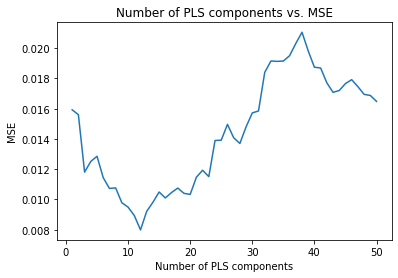

R2 calib: 0.777
R2 CV: 0.624
MSE calib: 0.004
MSE CV: 0.007
[0.14312019] [0.68681382]
None
0 site1b [0.47694744] [0.3838245182342343 'sla_site1b_08_025.tif']
1 site1b [0.27026377] [0.33754985166765256 'sla_site1b_08_027.tif']
2

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


 site1b [0.27858782] [0.2569465417035057 'sla_site1b_09_028.tif']
3 site1b [0.26588955] [0.28972467729564233 'sla_site1b_09_030.tif']
4 site1b [0.2803782] [0.2735223568677816 'sla_site1b_12_029.tif']
5 site1b [0.26542506] [0.21026411988922267 'sla_site1b_12_035.tif']
6 site1b [0.40888028] [0.362943277274796 'sla_site1b_14_023.tif']
7 site1b [0.52838449] [0.42854368645047386 'sla_site1b_14_053.tif']
8 site1b [0.33389756] [0.3356166071986052 'sla_site1b_15_022.tif']
9 site1b [0.40627401] [0.29199003620375913 'sla_site1b_16_041.tif']
10 site1b [0.45888465] [0.35499590518923296 'sla_site1b_17_038.tif']
11 site1b [0.36674764] [0.26188054868996025 'sla_site1b_17_042.tif']
12 site1b [0.39767232] [0.6567196484502895 'sla_site1b_17_043.tif']
13 site1b [0.29256778] [0.365531539474969 'sla_site1b_17_045.tif']
14 site1b [0.44952985] [0.23704444440536973 'sla_site1b_18_048.tif']
15 site1b [0.33135909] [0.26316276277040357 'sla_site1b_18_051.tif']
16 site1b [0.34613568] [0.35450655653749047 'sla_sit

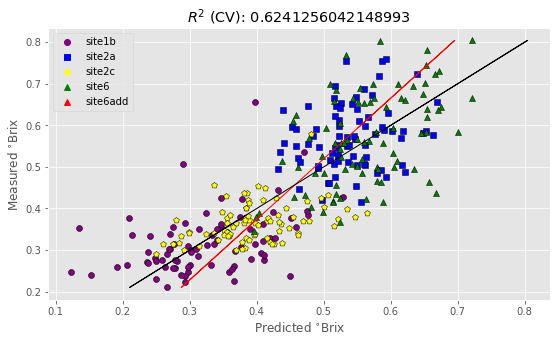

In [53]:
opt_Xc_sla_std, ncomp_sla_std, wav_sla_std, sorted_ind_sla_std = plot_mse_vs_components(x, y_sla_std, 50)

x1_sla_std = opt_Xc_sla_std[0:80,:]
x2_sla_std = opt_Xc_sla_std[80:160,:]
x3_sla_std = opt_Xc_sla_std[160:240,:]
x4_sla_std = opt_Xc_sla_std[240:550,:]

y1_sla_std = y_sla_std[0:80,:]
y2_sla_std = y_sla_std[80:160,:]
y3_sla_std = y_sla_std[160:240,:]
y4_sla_std = y_sla_std[240:550,:]
file_name_sla_std = 'E:/wenqu/model_csv_point/sla_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_std,x1_sla_std,x2_sla_std,x3_sla_std,x4_sla_std,
                             y_sla_std,y1_sla_std,y2_sla_std,y3_sla_std,y4_sla_std,
                             ncomp_sla_std, labels, file_name_sla_std)

In [71]:
optimal_pls_sla  = PLSRegression(n_components=12)
optimal_pls_sla.fit(opt_Xc_sla_std, y_sla_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_sla_std][wav_sla_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(69,) (69,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.16593618, -0.04996054, -0.23458229,  0.14824784, -0.14897821,
       -0.12267645,  0.13931174,  0.14175744, -0.13356591,  0.22427875,
        0.02171075,  0.08623341, -0.25504233, -0.11725105, -0.094496  ,
       -0.07662024,  0.17520195, -0.13051273,  0.12580275, -0.08097549,
        0.13059055, -0.13279464,  0.15347214,  0.25815726,  0.1146027 ,
       -0.00151052, -0.02572125, -0.16348059, -0.14220778, -0.11875234,
       -0.10373246, -0.20567149, -0.17419663,  0.1309263 ,  0.10788459,
       -0.03294584, -0.19100894, -0.11630441,  0.09974412, -0.2498001 ,
       -0.10836775,  0.17743334,  0.13848104,  0.21893697,  0.2440886 ,
       -0.23596256,  0.19996981, -0.18022217,  0.00506736,  0.13205962,
        0.06855068, -0.13651723, -0.11971752,  0.1362375 , -0.074409  ,
        0.2584478 ,  0.10264529,  0.24818002,  0.17607244,  0.11253954,
       -0.16889887, -0.21365258, -0.11041976,  0.19261383, -0.19423448,
       -0.33113449,  0.25438343,  0.11980089,  0.30264375])

In [72]:
optimal_pls_sla.intercept_

array([0.4568688])

In [73]:
bands_sla

array(['band_368', 'band_156', 'band_387', 'band_260', 'band_32',
       'band_88', 'band_244', 'band_394', 'band_359', 'band_58',
       'band_178', 'band_44', 'band_174', 'band_143', 'band_171',
       'band_345', 'band_381', 'band_342', 'band_91', 'band_106',
       'band_165', 'band_65', 'band_258', 'band_125', 'band_149',
       'band_145', 'band_146', 'band_270', 'band_155', 'band_219',
       'band_40', 'band_355', 'band_97', 'band_26', 'band_397', 'band_89',
       'band_81', 'band_175', 'band_21', 'band_352', 'band_221',
       'band_113', 'band_42', 'band_94', 'band_223', 'band_365',
       'band_235', 'band_364', 'band_116', 'band_226', 'band_180',
       'band_160', 'band_220', 'band_285', 'band_29', 'band_103',
       'band_153', 'band_166', 'band_391', 'band_117', 'band_23',
       'band_185', 'band_114', 'band_398', 'band_93', 'band_176',
       'band_104', 'band_216', 'band_225'], dtype='<U8')

# LDMC

In [54]:
ldmc_trait_pdf_ymax = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/numpy/resampled_ymax_ldmc.npy',  allow_pickle=True)
ldmc_trait_pdf_std = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/numpy/resampled_std_ldmc.npy',  allow_pickle=True)

In [55]:

y_ldmc_max1 = np.array(ldmc_trait_pdf_ymax)

y_ldmc_std1 = np.array(ldmc_trait_pdf_std)

In [56]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_max1 = y_ldmc_max1[0:80, :]
site2a_y_ldmc_max1 = y_ldmc_max1[115:195, :]
site2c_y_ldmc_max1 = y_ldmc_max1[230:310,:]
site6_y_ldmc_max1_1 = y_ldmc_max1[354:550,:]
# site6_y_ldmc_max1_2 = y_ldmc_max1[3394:3574,:]
y_ldmc_max = np.vstack((site1b_y_ldmc_max1, site2a_y_ldmc_max1,site2c_y_ldmc_max1,site6_y_ldmc_max1_1))
# site2c_x = x[]
y_ldmc_max.shape

(324, 2)

In [57]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_std1 = y_ldmc_std1[0:80, :]
site2a_y_ldmc_std1 = y_ldmc_std1[115:195, :]
site2c_y_ldmc_std1 = y_ldmc_std1[230:310,:]
site6_y_ldmc_std1_1 = y_ldmc_std1[354:550,:]
# site6_y_ldmc_std1_2 = y_ldmc_std1[3394:3574,:]
y_ldmc_std = np.vstack((site1b_y_ldmc_std1, site2a_y_ldmc_std1,site2c_y_ldmc_std1,site6_y_ldmc_std1_1))
# site2c_x = x[]
y_ldmc_std.shape

(324, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  18
Wavelengths to be discarded  194
Optimised MSEP  0.14540355174838512



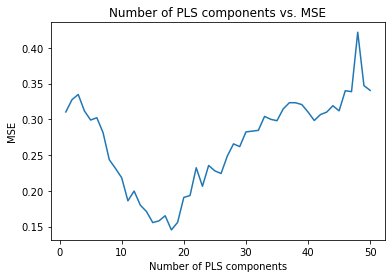

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.832
R2 CV: 0.537
MSE calib: 0.053
MSE CV: 0.145
[-0.1163894] [0.69061429]
None
0 site1b [-1.52586448] [-1.8890736457740287 'ldmc_site1b_08_025.tif']
1 site1b [-0.78007876] [-1.1372908386916536 'ldmc_site1b_08_027.tif']
2 site1b [-1.48767652] [-1.016356909642476 'ldmc_site1b_09_028.tif']
3 site1b [-1.83224388] [-1.5766582405663088 'ldmc_site1b_09_030.tif']
4 site1b [-0.05779578] [-0.9817417539220767 'ldmc_site1b_12_029.tif']
5 site1b [-0.34237419] [-0.1316408725840561 'ldmc_site1b_12_035.tif']
6 site1b [-1.11809474] [-1.2840614541734094 'ldmc_site1b_14_023.tif']
7 site1b [0.07626707] [1.0073640610704566 'ldmc_site1b_14_053.tif']
8 site1b [-0.80225159] [-0.9188883476938656 'ldmc_site1b_15_022.tif']
9 site1b [0.23436343] [0.306694499301428 'ldmc_site1b_16_041.tif']
10 site1b [-0.34685128] [-0.4109572661162697 'ldmc_site1b_17_038.tif']
11 site1b [-0.06795789] [-0.599345347414316 'ldmc_site1b_17_042.tif']
12 site1b [-0.64348435] [-0.33671168295503495 'ldmc_site1b_17_043.tif']
13

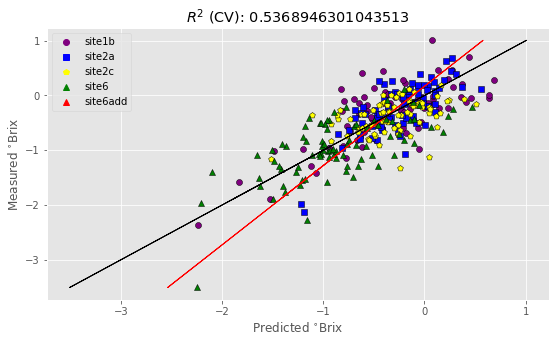

In [58]:
opt_Xc_ldmc_max, ncomp_ldmc_max, wav_ldmc_max, sorted_ind_ldmc_max = plot_mse_vs_components(x, y_ldmc_max, 50)
x1_ldmc_max = opt_Xc_ldmc_max[0:80,:]
x2_ldmc_max = opt_Xc_ldmc_max[80:160,:]
x3_ldmc_max = opt_Xc_ldmc_max[160:240,:]
x4_ldmc_max = opt_Xc_ldmc_max[240:550,:]

y1_ldmc_max = y_ldmc_max[0:80,:]
y2_ldmc_max = y_ldmc_max[80:160,:]
y3_ldmc_max = y_ldmc_max[160:240,:]
y4_ldmc_max = y_ldmc_max[240:550,:]
file_name_ldmc_max = 'E:/wenqu/model_csv_point/ldmc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_max,x1_ldmc_max,x2_ldmc_max,x3_ldmc_max,x4_ldmc_max,
                             y_ldmc_max,y1_ldmc_max,y2_ldmc_max,y3_ldmc_max,y4_ldmc_max,
                             ncomp_ldmc_max, labels, file_name_ldmc_max)

In [74]:
optimal_pls_sla  = PLSRegression(n_components=18)
optimal_pls_sla.fit(opt_Xc_ldmc_max, y_ldmc_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_ldmc_max][wav_ldmc_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(125,) (125,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-1.95041195, -0.87721467,  0.36342698,  0.04939813, -0.90448669,
       -0.38924152, -0.78799056,  1.84143313, -0.02049459, -0.08763566,
        0.55315115, -0.62455729,  0.2039014 ,  0.88466989, -0.58395008,
        0.87498038,  1.30738587, -0.55902392,  0.01433763,  1.08913378,
       -0.3599839 , -0.11823374, -0.96002123, -0.77987509,  0.55639527,
        0.86068062,  1.39577275,  0.61442455, -0.79608007,  0.80140191,
       -0.90894174,  0.55433029, -0.1770847 , -0.6474505 , -0.47602656,
       -0.42796044,  1.03745281,  1.10209081, -1.56022262, -0.24747318,
       -1.16714856, -0.69629045,  1.73338155, -1.63718551, -0.5258245 ,
        0.01661094,  0.98366058, -1.36264915,  0.51500844, -0.86756383,
        1.13717758, -0.01594412,  0.93103011,  1.32768134,  1.58755385,
        1.4421431 , -0.62024885,  0.34644734,  0.88504138,  0.40054461,
       -1.15122588, -1.0475358 ,  1.37544383,  1.44496174,  0.99430448,
       -0.79725065, -0.22048737, -0.52636834,  0.68625265, -0.96

In [75]:
optimal_pls_sla.intercept_

array([-0.47338136])

In [76]:
bands_sla

array(['band_230', 'band_106', 'band_330', 'band_33', 'band_58',
       'band_272', 'band_235', 'band_270', 'band_261', 'band_260',
       'band_90', 'band_282', 'band_244', 'band_391', 'band_403',
       'band_152', 'band_383', 'band_336', 'band_251', 'band_350',
       'band_362', 'band_271', 'band_91', 'band_264', 'band_335',
       'band_129', 'band_368', 'band_283', 'band_285', 'band_398',
       'band_348', 'band_20', 'band_395', 'band_44', 'band_332',
       'band_157', 'band_253', 'band_355', 'band_160', 'band_39',
       'band_95', 'band_75', 'band_281', 'band_247', 'band_353',
       'band_236', 'band_136', 'band_81', 'band_69', 'band_24',
       'band_342', 'band_161', 'band_19', 'band_179', 'band_243',
       'band_228', 'band_86', 'band_176', 'band_62', 'band_180',
       'band_49', 'band_237', 'band_23', 'band_224', 'band_274',
       'band_135', 'band_141', 'band_373', 'band_68', 'band_381',
       'band_177', 'band_65', 'band_134', 'band_394', 'band_174',
       'band_7

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  15
Wavelengths to be discarded  224
Optimised MSEP  0.023192150375836218



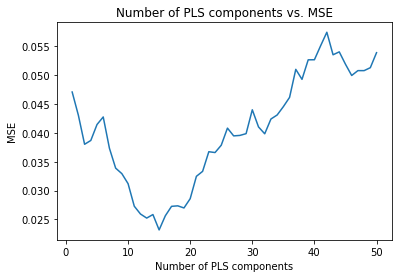

R2 calib: 0.862
R2 CV: 0.679
MSE calib: 0.009
MSE CV: 0.022
[0.21872179] [0.76615394]
None


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


0 site1b [0.92077953] [0.6366043933745096 'ldmc_site1b_08_025.tif']
1 site1b [0.80156418] [0.9074184362207464 'ldmc_site1b_08_027.tif']
2 site1b [0.90418704] [0.6363815388191427 'ldmc_site1b_09_028.tif']
3 site1b [0.95102822] [0.7408679085424071 'ldmc_site1b_09_030.tif']
4 site1b [0.45597092] [0.5533317496680291 'ldmc_site1b_12_029.tif']
5 site1b [0.6131168] [0.4901713635348937 'ldmc_site1b_12_035.tif']
6 site1b [0.82950691] [0.7770083320147 'ldmc_site1b_14_023.tif']
7 site1b [1.15731188] [1.0870311235616184 'ldmc_site1b_14_053.tif']
8 site1b [1.05559613] [0.9358032913577079 'ldmc_site1b_15_022.tif']
9 site1b [0.93672954] [0.795467764455096 'ldmc_site1b_16_041.tif']
10 site1b [0.96177892] [0.7562340184981367 'ldmc_site1b_17_038.tif']
11 site1b [0.84017787] [0.9165719195503238 'ldmc_site1b_17_042.tif']
12 site1b [0.96272481] [1.159009265223676 'ldmc_site1b_17_043.tif']
13 site1b [0.89693543] [0.7360823975572578 'ldmc_site1b_17_045.tif']
14 site1b [0.8413539] [0.6243664752973174 'ldmc_si

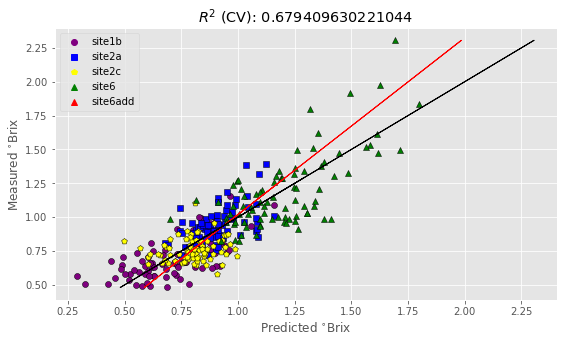

In [59]:
opt_Xc_ldmc_std, ncomp_ldmc_std, wav_ldmc_std, sorted_ind_ldmc_std = plot_mse_vs_components(x, y_ldmc_std, 50)

x1_ldmc_std = opt_Xc_ldmc_std[0:80,:]
x2_ldmc_std = opt_Xc_ldmc_std[80:160,:]
x3_ldmc_std = opt_Xc_ldmc_std[160:240,:]
x4_ldmc_std = opt_Xc_ldmc_std[240:550,:]

y1_ldmc_std = y_ldmc_std[0:80,:]
y2_ldmc_std = y_ldmc_std[80:160,:]
y3_ldmc_std = y_ldmc_std[160:240,:]
y4_ldmc_std = y_ldmc_std[240:550,:]
file_name_ldmc_max = 'E:/wenqu/model_csv_point/ldmc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_std,x1_ldmc_std,x2_ldmc_std,x3_ldmc_std,x4_ldmc_std,
                             y_ldmc_std,y1_ldmc_std,y2_ldmc_std,y3_ldmc_std,y4_ldmc_std,
                             ncomp_ldmc_std, labels, file_name_ldmc_max)

In [77]:
optimal_pls_sla  = PLSRegression(n_components=15)
optimal_pls_sla.fit(opt_Xc_ldmc_std, y_ldmc_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_ldmc_std][wav_ldmc_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(95,) (95,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.44680588,  0.20757121,  0.6233906 ,  0.42111676, -0.43823866,
        0.62910467, -0.30876172, -0.30837644,  0.5804859 , -0.00727591,
       -0.23454074, -0.21336441,  0.31192098, -0.32381274,  0.12313301,
       -0.26174982, -0.36001751,  0.31823403, -0.11748162,  0.27282231,
        0.61892888, -0.28620064, -0.10576694,  0.20795995,  0.03952748,
        0.23722305, -0.33464181,  0.26056934,  0.29196449, -0.19844152,
       -0.30522424, -0.35825787,  0.03749111, -0.41955427, -0.03333479,
       -0.25494257,  0.64593385, -0.26271466, -0.8306877 , -0.29727887,
       -0.30182133,  0.49766567,  0.39550839, -0.29181909, -0.66148179,
       -0.72463703, -0.35850057, -0.53510515, -0.19771543, -0.59027981,
        0.37913068,  0.28550651, -0.46341839, -0.04952382,  0.31092774,
        0.44179043, -0.33615392, -0.60364331, -0.67274413, -0.35679691,
       -0.60493988,  0.22962929,  0.59643759,  0.41204461,  0.58582551,
        0.47899066,  0.44413835, -0.32289853,  0.45610848,  0.46

In [78]:
optimal_pls_sla.intercept_

array([0.9012134])

In [79]:
bands_sla

array(['band_224', 'band_254', 'band_360', 'band_102', 'band_280',
       'band_53', 'band_173', 'band_365', 'band_137', 'band_367',
       'band_279', 'band_23', 'band_71', 'band_184', 'band_397',
       'band_70', 'band_88', 'band_285', 'band_81', 'band_180',
       'band_166', 'band_392', 'band_127', 'band_120', 'band_90',
       'band_114', 'band_220', 'band_266', 'band_161', 'band_146',
       'band_101', 'band_131', 'band_233', 'band_378', 'band_21',
       'band_177', 'band_383', 'band_89', 'band_350', 'band_34',
       'band_334', 'band_234', 'band_244', 'band_83', 'band_265',
       'band_278', 'band_387', 'band_178', 'band_25', 'band_78',
       'band_94', 'band_329', 'band_51', 'band_136', 'band_44',
       'band_236', 'band_252', 'band_176', 'band_145', 'band_156',
       'band_160', 'band_18', 'band_58', 'band_256', 'band_85',
       'band_125', 'band_153', 'band_357', 'band_359', 'band_158',
       'band_349', 'band_63', 'band_26', 'band_381', 'band_55', 'band_47',
      

# PN

In [ ]:
# pn_trait_pdf_ymax = np.load('E:/wenqu/probability_density_function/without_dem_numpy/sorted/resampled_ymax_pn.npy',  allow_pickle=True)
# pn_trait_pdf_std = np.load('E:/wenqu/probability_density_function/without_dem_numpy/sorted/resampled_std_pn.npy',  allow_pickle=True)

In [ ]:
# y_pn_max1 = np.array(pn_trait_pdf_ymax)

# y_pn_std1 = np.array(pn_trait_pdf_std)

In [ ]:
# site1b_y_pn_max1 = y_pn_max1[0:300, :]
# site2a_y_pn_max1 = y_pn_max1[300:600, :]
# site2c_y_pn_max1 = y_pn_max1[600:900,:]
# site6_y_pn_max1_1 = y_pn_max1[900:1193,:]
# # site6_y_pn_max1_2 = y_pn_max1[3394:3574,:]
# y_pn_max = np.vstack((site1b_y_pn_max1, site2a_y_pn_max1,site2c_y_pn_max1,site6_y_pn_max1_1))
# # site2c_x = x[]
# y_pn_max.shape

In [ ]:
# site1b_y_pn_std1 = y_pn_std1[0:300, :]
# site2a_y_pn_std1 = y_pn_std1[300:600, :]
# site2c_y_pn_std1 = y_pn_std1[600:900,:]
# site6_y_pn_std1_1 = y_pn_std1[900:1193,:]
# # site6_y_pn_std1_2 = y_pn_std1[3394:3574,:]
# y_pn_std = np.vstack((site1b_y_pn_std1, site2a_y_pn_std1,site2c_y_pn_std1,site6_y_pn_std1_1))
# # site2c_x = x[]
# y_pn_std.shape

In [ ]:
# opt_Xc_pn_max, ncomp_pn_max, wav_pn_max, sorted_ind_pn_max = plot_mse_vs_components(x, y_pn_max, 50)
# x1_pn_max = opt_Xc_pn_max[0:300,:]
# x2_pn_max = opt_Xc_pn_max[300:600,:]
# x3_pn_max = opt_Xc_pn_max[600:900,:]
# x4_pn_max = opt_Xc_pn_max[900:1193,:]

# y1_pn_max = y_pn_max[0:300,:]
# y2_pn_max = y_pn_max[300:600,:]
# y3_pn_max = y_pn_max[600:900,:]
# y4_pn_max = y_pn_max[900:1193,:]
# file_name_pn_max = 'E:/wenqu/model_csv_point/pn_max_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_pn_max,x1_pn_max,x2_pn_max,x3_pn_max,x4_pn_max,
#                              y_pn_max,y1_pn_max,y2_pn_max,y3_pn_max,y4_pn_max,
#                              ncomp_pn_max, labels, file_name_pn_max)

In [ ]:
# opt_Xc_pn_std, ncomp_pn_std, wav_pn_std, sorted_ind_pn_std = plot_mse_vs_components(x, y_pn_std, 50)

# x1_pn_std = opt_Xc_pn_std[0:300,:]
# x2_pn_std = opt_Xc_pn_std[300:600,:]
# x3_pn_std = opt_Xc_pn_std[600:900,:]
# x4_pn_std = opt_Xc_pn_std[900:1193,:]

# y1_pn_std = y_pn_std[0:300,:]
# y2_pn_std = y_pn_std[300:600,:]
# y3_pn_std = y_pn_std[600:900,:]
# y4_pn_std = y_pn_std[900:1193,:]
# file_name_pn_std = 'E:/wenqu/model_csv_point/pn_std_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_pn_std,x1_pn_std,x2_pn_std,x3_pn_std,x4_pn_std,
#                              y_pn_std,y1_pn_std,y2_pn_std,y3_pn_std,y4_pn_std,
#                              ncomp_pn_std, labels, file_name_pn_std)

# PC

In [60]:
pc_trait_pdf_ymax = np.load(r'E:/wenqu/trait_map/update1/trait_map_with_scale/training/numpy/resampled_ymax_pc.npy',  allow_pickle=True)
pc_trait_pdf_std = np.load(r'E:/wenqu/trait_map/update1/trait_map_with_scale/training/numpy/resampled_std_pc.npy',  allow_pickle=True)

In [61]:
y_pc_max1 = np.array(pc_trait_pdf_ymax)

y_pc_std1 = np.array(pc_trait_pdf_std)

In [62]:
site1b_y_pc_max1 = y_pc_max1[0:80, :]
site2a_y_pc_max1 = y_pc_max1[115:195, :]
site2c_y_pc_max1 = y_pc_max1[230:310,:]
site6_y_pc_max1_1 = y_pc_max1[354:550,:]
# site6_y_pn_max1_2 = y_pn_max1[3394:3574,:]
y_pc_max = np.vstack((site1b_y_pc_max1, site2a_y_pc_max1,site2c_y_pc_max1,site6_y_pc_max1_1))
# site2c_x = x[]
y_pc_max.shape

(324, 2)

In [63]:
site1b_y_pc_std1 = y_pc_std1[0:80, :]
site2a_y_pc_std1 = y_pc_std1[115:195, :]
site2c_y_pc_std1 = y_pc_std1[230:310,:]
site6_y_pc_std1_1 = y_pc_std1[354:550,:]
# site6_y_pn_std1_2 = y_pn_std1[3394:3574,:]
y_pc_std = np.vstack((site1b_y_pc_std1, site2a_y_pc_std1,site2c_y_pc_std1,site6_y_pc_std1_1))
# site2c_x = x[]
y_pc_std.shape

(324, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  255
Optimised MSEP  0.0035976778291221165



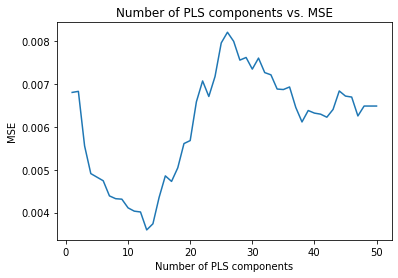

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [64]:
opt_Xc_pc_max, ncomp_pc_max, wav_pc_max, sorted_ind_pc_max = plot_mse_vs_components(x, y_pc_max, 50)
x1_pc_max = opt_Xc_pc_max[0:80,:]
x2_pc_max = opt_Xc_pc_max[80:160,:]
x3_pc_max = opt_Xc_pc_max[160:240,:]
x4_pc_max = opt_Xc_pc_max[240:550,:]

y1_pc_max = y_pc_max[0:80,:]
y2_pc_max = y_pc_max[80:160,:]
y3_pc_max = y_pc_max[160:240,:]
y4_pc_max = y_pc_max[240:550,:]


In [80]:
optimal_pls_sla  = PLSRegression(n_components=13)
optimal_pls_sla.fit(opt_Xc_pc_max, y_pc_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_pc_max][wav_pc_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(64,) (64,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.14460656,  0.04726527,  0.21212775, -0.19952907,  0.21080505,
        0.07859413,  0.15911853,  0.02146485, -0.13996731, -0.12197604,
       -0.21714375, -0.06423986, -0.06581278,  0.2921685 ,  0.11966465,
        0.12325484, -0.01230507, -0.26183336, -0.17023688, -0.14050069,
        0.154399  , -0.23788195,  0.16079482,  0.13256118,  0.12110931,
        0.05410322, -0.03859663, -0.18811289,  0.27464986, -0.16574682,
       -0.10297506,  0.10601329, -0.04808029, -0.17385222, -0.19052762,
       -0.08610729, -0.12072724,  0.04816717, -0.07929021, -0.16187802,
        0.09420619,  0.00366308, -0.01232536,  0.1223435 , -0.0634716 ,
        0.14985525,  0.06949759,  0.10795856, -0.18073604, -0.26783638,
        0.30004511,  0.32450664,  0.16359751, -0.21547435,  0.19079199,
        0.03899229, -0.2278866 , -0.22835326, -0.16181782,  0.09576389,
        0.20465384,  0.14216589, -0.12364692,  0.26647171])

In [81]:
optimal_pls_sla.intercept_

array([3.82818601])

In [82]:
bands_sla

array(['band_167', 'band_100', 'band_262', 'band_225', 'band_254',
       'band_179', 'band_393', 'band_85', 'band_230', 'band_372',
       'band_360', 'band_160', 'band_339', 'band_258', 'band_336',
       'band_107', 'band_396', 'band_232', 'band_170', 'band_166',
       'band_117', 'band_87', 'band_184', 'band_86', 'band_181',
       'band_69', 'band_102', 'band_130', 'band_98', 'band_354',
       'band_112', 'band_261', 'band_40', 'band_376', 'band_119',
       'band_62', 'band_120', 'band_37', 'band_220', 'band_342',
       'band_154', 'band_109', 'band_398', 'band_374', 'band_172',
       'band_114', 'band_399', 'band_217', 'band_30', 'band_84',
       'band_386', 'band_331', 'band_43', 'band_397', 'band_401',
       'band_271', 'band_373', 'band_22', 'band_284', 'band_19',
       'band_223', 'band_136', 'band_338', 'band_27'], dtype='<U8')

R2 calib: 0.691
R2 CV: 0.491
MSE calib: 0.002
MSE CV: 0.004
[1.51761377] [0.6039849]
None
0 site1b [3.71712938] [3.518886820347465 'pc_site1b_08_025.tif']
1 site1b [3.68999803] [3.657733964514115 'pc_site1b_08_027.tif']
2 site1b [3.67511759] [3.660786796123986 'pc_site1b_09_028.tif']
3 site1b [3.60397617] [3.5967931564934905 'pc_site1b_09_030.tif']
4 site1b [3.76511115] [3.7223059865003965 'pc_site1b_12_029.tif']
5 site1b [3.77269167] [3.7462187326937664 'pc_site1b_12_035.tif']
6 site1b [3.60033724] [3.546779591822439 'pc_site1b_14_023.tif']
7 site1b [3.90943573] [3.843057784803277 'pc_site1b_14_053.tif']
8 site1b [3.63015314] [3.594863002297169 'pc_site1b_15_022.tif']
9 site1b [3.88271134] [3.847030883611904 'pc_site1b_16_041.tif']
10 site1b [3.78069052] [3.681519336138188 'pc_site1b_17_038.tif']
11 site1b [3.80770002] [3.678387010926677 'pc_site1b_17_042.tif']
12 site1b [3.73405263] [3.7980637385268117 'pc_site1b_17_043.tif']
13 site1b [3.75554855] [3.907828936951604 'pc_site1b_17_04

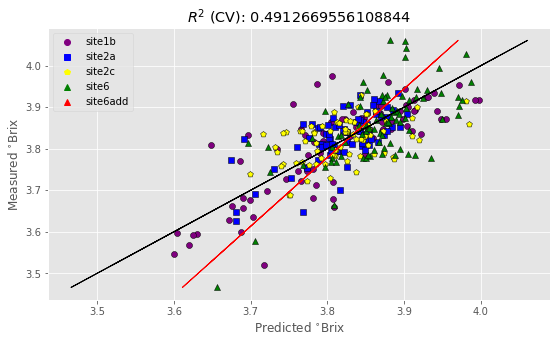

In [65]:
file_name_pc_max = 'E:/wenqu/model_csv_point/pc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_max,x1_pc_max, x2_pc_max,x3_pc_max,x4_pc_max,
                             y_pc_max,y1_pc_max,y2_pc_max,y3_pc_max,y4_pc_max,
                             ncomp_pc_max, labels, file_name_pc_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  218
Optimised MSEP  0.0010699038984100003



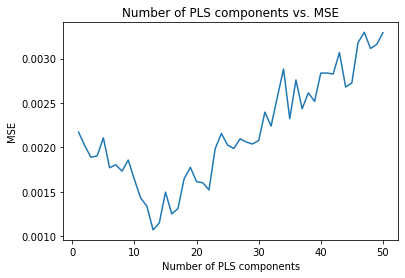

R2 calib: 0.781
R2 CV: 0.484
MSE calib: 0.000
MSE CV: 0.001
[0.06000923] [0.6098023]
None


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


0 site1b [0.15610695] [0.10928255944492676 'pc_site1b_08_025.tif']
1 site1b [0.07306554] [0.13604774809413256 'pc_site1b_08_027.tif']
2 site1b [0.0897748] [0.09156277866271816 'pc_site1b_09_028.tif']
3 site1b [0.07908066] [0.10706168777188109 'pc_site1b_09_030.tif']
4 site1b [0.07419845] [0.09614588836687735 'pc_site1b_12_029.tif']
5 site1b [0.08429791] [0.09120885867977817 'pc_site1b_12_035.tif']
6 site1b [0.13394321] [0.11649260797734885 'pc_site1b_14_023.tif']
7 site1b [0.25793611] [0.14840796939632495 'pc_site1b_14_053.tif']
8 site1b [0.13261197] [0.11739155565715613 'pc_site1b_15_022.tif']
9 site1b [0.15191784] [0.12336523523753556 'pc_site1b_16_041.tif']
10 site1b [0.12558974] [0.11898047831867245 'pc_site1b_17_038.tif']
11 site1b [0.12668089] [0.10888373018483045 'pc_site1b_17_042.tif']
12 site1b [0.16055978] [0.20299295537074358 'pc_site1b_17_043.tif']
13 site1b [0.12042315] [0.1138251880950034 'pc_site1b_17_045.tif']
14 site1b [0.10800082] [0.09380623839811028 'pc_site1b_18_04

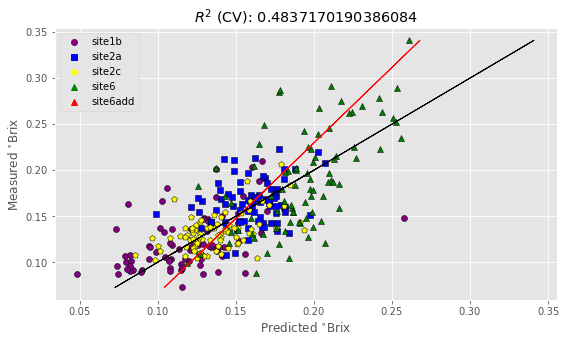

In [66]:
opt_Xc_pc_std, ncomp_pc_std, wav_pc_std, sorted_ind_pc_std = plot_mse_vs_components(x, y_pc_std, 50)

x1_pc_std = opt_Xc_pc_std[0:80,:]
x2_pc_std = opt_Xc_pc_std[80:160,:]
x3_pc_std = opt_Xc_pc_std[160:240,:]
x4_pc_std = opt_Xc_pc_std[240:550,:]

y1_pc_std = y_pc_std[0:80,:]
y2_pc_std = y_pc_std[80:160,:]
y3_pc_std = y_pc_std[160:240,:]
y4_pc_std = y_pc_std[240:550,:]
file_name_pc_std = 'E:/wenqu/model_csv_point/pc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_std,x1_pc_std,x2_pc_std,x3_pc_std,x4_pc_std,
                             y_pc_std,y1_pc_std,y2_pc_std,y3_pc_std,y4_pc_std,
                             ncomp_pc_std, labels, file_name_pc_std)

In [83]:
optimal_pls_sla  = PLSRegression(n_components=13)
optimal_pls_sla.fit(opt_Xc_pc_std, y_pc_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_pc_std][wav_pc_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(101,) (101,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.08305604,  0.02563276,  0.07001932, -0.07330928, -0.02959904,
       -0.06181238,  0.05166224,  0.0423939 ,  0.08608444,  0.03241446,
        0.00589102,  0.03105683,  0.03610003, -0.07109218, -0.01392581,
       -0.08098043,  0.05535809,  0.0436423 ,  0.06043147, -0.09003709,
       -0.03564026, -0.06876465, -0.02642302,  0.01485242,  0.07402576,
        0.03041181,  0.06124964, -0.04902139,  0.04406641,  0.01223253,
       -0.04552591, -0.02248769, -0.06851422,  0.06682079, -0.01776066,
        0.01342628, -0.06237076,  0.0108453 , -0.02556704, -0.04705706,
       -0.04222951,  0.0637625 , -0.06987194,  0.08712824, -0.06206856,
        0.06909553, -0.06813872,  0.01971074,  0.04089133,  0.03832639,
        0.035126  , -0.06999792,  0.06964782,  0.00515899, -0.0722595 ,
        0.00646491, -0.0654743 , -0.07860738,  0.08014102,  0.07077531,
        0.08535242,  0.03833126, -0.07515243, -0.08364529,  0.06712663,
       -0.09733121,  0.07829827, -0.08182713,  0.06428929,  0.06

In [84]:
optimal_pls_sla.intercept_

array([0.15281088])

In [85]:
bands_sla

array(['band_331', 'band_133', 'band_332', 'band_349', 'band_156',
       'band_270', 'band_125', 'band_379', 'band_262', 'band_235',
       'band_52', 'band_236', 'band_404', 'band_96', 'band_268',
       'band_48', 'band_147', 'band_113', 'band_144', 'band_252',
       'band_217', 'band_352', 'band_162', 'band_58', 'band_170',
       'band_118', 'band_149', 'band_364', 'band_92', 'band_69',
       'band_81', 'band_34', 'band_396', 'band_373', 'band_185',
       'band_21', 'band_177', 'band_72', 'band_221', 'band_88',
       'band_393', 'band_148', 'band_61', 'band_137', 'band_40',
       'band_54', 'band_145', 'band_226', 'band_153', 'band_371',
       'band_389', 'band_178', 'band_94', 'band_233', 'band_65',
       'band_26', 'band_357', 'band_164', 'band_381', 'band_103',
       'band_85', 'band_44', 'band_143', 'band_355', 'band_258',
       'band_224', 'band_165', 'band_342', 'band_380', 'band_59',
       'band_220', 'band_24', 'band_176', 'band_337', 'band_42',
       'band_216'